<h1>Hey everyone! 🙌🏻</h1>
<h1>Let’s discover some exciting insights together! 🌟📊</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)

3.9.2


In [ ]:
! pip install pandas
! pip install matplotlib
! pip install imbalanced-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.base import SamplerMixin
import imblearn.over_sampling
import imblearn.combine
import imblearn
print(imblearn.__version__)


0.13.0


In [5]:
df = pd.read_csv(r"d:\4rd FCI\24' Material\Breast-Cancer-METABRIC-Uncleaned.csv")
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,$$mb-0000,75.65,mastectomy,$$Breast cancer,$$breast invasive ductal carcinoma,NaN,$$no,$$Claudin-low,1.0,Positve,...,living,negative,$$YES,138.65,not recurred,female,$$er-/her2-,22.0,2.0,Living
1,mb-0002,43.19,Breast conserving,$$BREAST CANCER,$$Breast invasive ductal carcinoma,$$high,no,Luma,1.0,POSITVE,...,$$Living,$$Positive,yes,83.52,Not recurred,Female,er+/her2- high prolif,10.0,1.0,living
2,MB-0005,48.87,$$MASTECTOMY,breast cancer,breast invasive ductal carcinoma,HIGH,YES,$$lumb,1.0,$$positve,...,$$deceased,$$positive,No,151.28,$$Recurred,female,nan,15.0,2.0,Died of disease
3,mb-0006,NaN,mastectomy,Breast cancer,$$Breast mixed ductal and lobular carcinoma,moderate,yes,LUMB,1.0,POSITVE,...,living,positive,$$yes,162.76,$$NOT RECURRED,female,NaN,25.0,2.0,living
4,mb-0008,76.97,mastectomy,$$breast cancer,$$Breast mixed ductal and lobular carcinoma,$$high,$$yes,Lumb,NaN,Positve,...,DECEASED,positive,YES,18.55,recurred,$$Female,$$ER+/HER2- HIGH PROLIF,40.0,2.0,$$died of disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,Mts-t2407,28.05,$$Nan,breast cancer,Breast invasive ductal carcinoma,nan,$$NAN,$$nan,1.0,negative,...,Nan,nan,NAN,23.26,recurred,$$female,NaN,35.0,2.0,NaN
2630,$$Mb-0440,56.73,$$BREAST CONSERVING,breast cancer,BREAST INVASIVE DUCTAL CARCINOMA,HIGH,$$yes,$$lumb,1.0,positve,...,living,$$negative,yes,99.51,not recurred,FEMALE,er+/her2- high prolif,26.0,2.0,Living
2631,MTS-T1020,62.45,NaN,breast cancer,BREAST INVASIVE DUCTAL CARCINOMA,nan,$$NAN,NAN,1.0,$$NEGATIVE,...,$$Nan,Nan,Nan,196.88,not recurred,FEMALE,nan,25.0,2.0,nan
2632,$$MTS-T0260,56.95,Nan,BREAST CANCER,breast invasive lobular carcinoma,nan,NAN,NaN,1.0,positve,...,nan,nan,$$Nan,55.76,RECURRED,Female,Nan,75.0,2.0,nan


In [6]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,$$mb-0000,75.65,mastectomy,$$Breast cancer,$$breast invasive ductal carcinoma,NaN,$$no,$$Claudin-low,1.0,Positve,...,living,negative,$$YES,138.65,not recurred,female,$$er-/her2-,22.0,2.0,Living
1,mb-0002,43.19,Breast conserving,$$BREAST CANCER,$$Breast invasive ductal carcinoma,$$high,no,Luma,1.0,POSITVE,...,$$Living,$$Positive,yes,83.52,Not recurred,Female,er+/her2- high prolif,10.0,1.0,living
2,MB-0005,48.87,$$MASTECTOMY,breast cancer,breast invasive ductal carcinoma,HIGH,YES,$$lumb,1.0,$$positve,...,$$deceased,$$positive,No,151.28,$$Recurred,female,nan,15.0,2.0,Died of disease
3,mb-0006,NaN,mastectomy,Breast cancer,$$Breast mixed ductal and lobular carcinoma,moderate,yes,LUMB,1.0,POSITVE,...,living,positive,$$yes,162.76,$$NOT RECURRED,female,NaN,25.0,2.0,living
4,mb-0008,76.97,mastectomy,$$breast cancer,$$Breast mixed ductal and lobular carcinoma,$$high,$$yes,Lumb,NaN,Positve,...,DECEASED,positive,YES,18.55,recurred,$$Female,$$ER+/HER2- HIGH PROLIF,40.0,2.0,$$died of disease


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2634 non-null   object 
 1   Age at Diagnosis                2553 non-null   float64
 2   Type of Breast Surgery          2560 non-null   object 
 3   Cancer Type                     2634 non-null   object 
 4   Cancer Type Detailed            2634 non-null   object 
 5   Cellularity                     2555 non-null   object 
 6   Chemotherapy                    2553 non-null   object 
 7   Pam50 + Claudin-low subtype     2575 non-null   object 
 8   Cohort                          2554 non-null   float64
 9   ER status measured by IHC       2618 non-null   object 
 10  ER Status                       2629 non-null   object 
 11  Neoplasm Histologic Grade       2441 non-null   float64
 12  HER2 status measured by SNP6    25

In [366]:
df.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2553.000000,2554.000000,2441.000000,2288.000000,2413.000000,2334.000000,2021.000000,2437.000000,2474.000000,1819.000000
mean,60.420983,2.911511,2.412946,1.936189,5.611272,4.016928,125.291786,108.417497,26.209911,1.714678
std,13.007132,1.976755,0.652156,3.989639,3.995716,1.193164,76.381543,76.197903,15.291882,0.653718
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.990000,1.000000,2.000000,0.000000,3.000000,3.046000,60.266667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.042500,116.533333,98.780000,23.000000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.010000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


<h1>Data Analayis 
Questions ⁉️🤔</h1>

1. What is the percentage of patients who underwent chemotherapy for each cancer stage?

2. How does the tumor size differ for patients who survived vs those who didn't?

3. What are the most common types of breast surgery?

4. What is the survival status distribution across different cellularity levels?

5. How does the relapse-free status vary by tumor stage?

6. Which age group has the highest percentage of patients diagnosed?

7. Is there any correlation between mutation count and overall survival time?

8. What is the average number of lymph nodes examined for each tumor stage?

9. Which integrative cluster has the highest survival rate?

10. Are there any patterns between hormone therapy and relapse-free time?

In [8]:

# 1. Percentage of patients who underwent chemotherapy for each cancer stage
chemotherapy_percentage = df.groupby('Tumor Stage')['Chemotherapy'].value_counts(normalize=True).unstack() * 100
print("Percentage of Chemotherapy Patients by Cancer Stage:")
print(chemotherapy_percentage)

Percentage of Chemotherapy Patients by Cancer Stage:
Chemotherapy     $$NAN      $$NO     $$Nan      $$No     $$YES     $$Yes  \
Tumor Stage                                                                
0.0                NaN  4.000000       NaN       NaN       NaN       NaN   
1.0           1.294498  4.530744  1.294498  3.721683  0.647249  0.161812   
2.0           1.325178  3.975535  0.611621  3.567788  1.630989  2.242610   
3.0           2.189781  4.379562  1.459854  3.649635  5.109489  4.379562   
4.0                NaN       NaN       NaN       NaN       NaN       NaN   

Chemotherapy     $$nan      $$no     $$yes        NAN  ...        No   \
Tumor Stage                                            ...              
0.0           8.000000  8.000000       NaN  12.000000  ...  16.000000   
1.0           1.456311  9.223301  0.161812   2.265372  ...  10.194175   
2.0           1.732926  8.970438  3.669725   1.223242  ...   8.154944   
3.0           0.729927  2.919708  5.839416   2.91

In [9]:
# 2. Tumor size difference for survival status
tumor_size_survival = df.groupby("Patient's Vital Status")['Tumor Size'].mean()
print("Tumor Size by Survival Status:")
print(tumor_size_survival)

Tumor Size by Survival Status:
Patient's Vital Status
$$DIED OF DISEASE         30.848889
$$DIED OF OTHER CAUSES    27.161290
$$Died of disease         24.495556
$$Died of other causes    26.837778
$$LIVING                  23.020408
$$Living                  20.554386
$$NAN                     31.600000
$$Nan                     27.504167
$$died of disease         33.684146
$$died of other causes    26.973684
$$living                  23.505208
$$nan                     26.958333
DIED OF DISEASE           27.020513
DIED OF DISEASE           31.306667
DIED OF OTHER CAUSES      27.583333
DIED OF OTHER CAUSES      23.306122
Died of disease           32.026923
Died of disease           31.560440
Died of other causes      24.394595
Died of other causes      24.358904
LIVING                    22.113208
LIVING                    23.126882
Living                    26.709848
Living                    22.656481
NAN                       24.062500
NAN                       24.926415
Nan       

In [10]:
# 3. Most common types of breast surgery
breast_surgery_types = df['Type of Breast Surgery'].value_counts()
print("Most Common Types of Breast Surgery:")
print(breast_surgery_types)

Most Common Types of Breast Surgery:
mastectomy             325
breast conserving      207
mastectomy             163
MASTECTOMY             149
Mastectomy             143
$$mastectomy           137
nan                    136
Breast conserving      115
breast conserving      108
BREAST CONSERVING       91
$$breast conserving     86
$$MASTECTOMY            83
Nan                     77
NAN                     76
MASTECTOMY              76
Mastectomy              74
$$Mastectomy            74
$$nan                   67
BREAST CONSERVING       61
Breast conserving       58
$$Breast conserving     53
$$NAN                   48
$$BREAST CONSERVING     45
$$Nan                   38
NAN                     37
Nan                     33
Name: Type of Breast Surgery, dtype: int64


In [11]:
# 4. Survival status distribution across different cellularity levels
cellularity_survival = df.groupby('Cellularity')["Patient's Vital Status"].value_counts(normalize=True).unstack()
print("Survival Status by Cellularity:")
print(cellularity_survival)

Survival Status by Cellularity:
Patient's Vital Status  $$DIED OF DISEASE  $$DIED OF OTHER CAUSES  \
Cellularity                                                         
$$HIGH                           0.030769                     NaN   
$$High                           0.042857                     NaN   
$$LOW                                 NaN                     NaN   
$$Low                                 NaN                     NaN   
$$MODERATE                       0.019608                     NaN   
$$Moderate                       0.024390                0.024390   
$$NAN                                 NaN                     NaN   
$$Nan                                 NaN                     NaN   
$$high                           0.031746                0.031746   
$$low                                 NaN                     NaN   
$$moderate                            NaN                0.049505   
$$nan                                 NaN                     NaN   
HI

In [12]:
# 5. Relapse-free status by tumor stage
relapse_by_stage = df.groupby('Tumor Stage')['Relapse Free Status'].value_counts(normalize=True).unstack()
print("Relapse-Free Status by Tumor Stage:")
print(relapse_by_stage)

Relapse-Free Status by Tumor Stage:
Relapse Free Status     $$NAN  $$NOT RECURRED     $$Nan  $$Not recurred  \
Tumor Stage                                                               
0.0                  0.041667        0.083333  0.041667             NaN   
1.0                  0.001575        0.036220       NaN        0.040945   
2.0                       NaN        0.034930       NaN        0.037924   
3.0                       NaN        0.034483       NaN        0.020690   
4.0                       NaN             NaN       NaN             NaN   

Relapse Free Status  $$RECURRED  $$Recurred     $$nan  $$not recurred  \
Tumor Stage                                                             
0.0                         NaN         NaN       NaN        0.125000   
1.0                    0.028346    0.028346  0.001575        0.081890   
2.0                    0.024950    0.018962  0.000998        0.077844   
3.0                    0.034483    0.055172  0.006897        0.062069   


In [14]:
# 6. Age group with highest percentage of patients diagnosed
df['Age Group'] = pd.cut(df['Age at Diagnosis'], bins=[0, 40, 50, 60, 70, 80, 90], labels=['<40', '40-50', '50-60', '60-70', '70-80', '>80'])
age_group_distribution = df['Age Group'].value_counts(normalize=True) * 100
print("Age Group Distribution:")
print(age_group_distribution)

Age Group Distribution:
60-70    28.700432
50-60    23.753435
70-80    19.199058
40-50    16.058108
<40       6.753043
>80       5.535925
Name: Age Group, dtype: float64


In [15]:
# 7. Correlation between mutation count and survival time
correlation_mutation_survival = df['Mutation Count'].corr(df['Overall Survival (Months)'])
print("Correlation Between Mutation Count and Overall Survival Time:")
print(correlation_mutation_survival)


Correlation Between Mutation Count and Overall Survival Time:
0.043183857530330196


In [16]:
# 8. Average number of lymph nodes examined for each tumor stage
lymph_nodes_by_stage = df.groupby('Tumor Stage')['Lymph nodes examined positive'].mean()
print("Average Lymph Nodes Examined by Tumor Stage:")
print(lymph_nodes_by_stage)

Average Lymph Nodes Examined by Tumor Stage:
Tumor Stage
0.0    0.000000
1.0    0.064815
2.0    2.093649
3.0    6.779528
4.0    7.000000
Name: Lymph nodes examined positive, dtype: float64


In [17]:
# 9. Integrative cluster with highest survival rate
cluster_survival_rate = df.groupby('Integrative Cluster')["Patient's Vital Status"].value_counts(normalize=True).unstack()
print("Survival Rate by Integrative Cluster:")
print(cluster_survival_rate)

Survival Rate by Integrative Cluster:
Patient's Vital Status  $$DIED OF DISEASE  $$DIED OF OTHER CAUSES  \
Integrative Cluster                                                 
$$1                              0.055556                0.027778   
$$10                                  NaN                     NaN   
$$2                                   NaN                     NaN   
$$3                                   NaN                     NaN   
$$4ER+                                NaN                0.041667   
$$4ER-                                NaN                     NaN   
$$4er+                                NaN                     NaN   
$$4er-                                NaN                     NaN   
$$5                              0.058824                     NaN   
$$6                              0.050000                0.100000   
$$7                              0.020000                     NaN   
$$8                              0.042857                0.014286

In [18]:
# 10. Patterns between hormone therapy and relapse-free time
hormone_therapy_relapse = df.groupby('Hormone Therapy')['Relapse Free Status (Months)'].mean()
print("Relapse-Free Time by Hormone Therapy:")
print(hormone_therapy_relapse)

Relapse-Free Time by Hormone Therapy:
Hormone Therapy
$$NAN    104.024615
$$NO     110.705116
$$Nan    112.235667
$$No     111.265091
$$YES    111.356067
$$Yes    113.881846
$$nan     91.017111
$$no     108.943131
$$yes    104.386233
NAN      116.727000
NAN      102.510408
NO       105.050000
NO       125.957822
Nan      104.486154
Nan      112.324000
No        97.846977
No       112.880778
YES      112.166133
YES      107.990506
Yes       86.477833
Yes      110.548973
nan      110.812202
no       118.427500
no       118.942028
yes      104.624340
yes      103.074281
Name: Relapse Free Status (Months), dtype: float64


In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

In [21]:
numeric_cols

['Age at Diagnosis',
 'Cohort',
 'Neoplasm Histologic Grade',
 'Lymph nodes examined positive',
 'Mutation Count',
 'Nottingham prognostic index',
 'Overall Survival (Months)',
 'Relapse Free Status (Months)',
 'Tumor Size',
 'Tumor Stage']

In [22]:
categorical_cols

['Patient ID',
 'Type of Breast Surgery',
 'Cancer Type',
 'Cancer Type Detailed',
 'Cellularity',
 'Chemotherapy',
 'Pam50 + Claudin-low subtype',
 'ER status measured by IHC',
 'ER Status',
 'HER2 status measured by SNP6',
 'HER2 Status',
 'Tumor Other Histologic Subtype',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Primary Tumor Laterality',
 'Oncotree Code',
 'Overall Survival Status',
 'PR Status',
 'Radio Therapy',
 'Relapse Free Status',
 'Sex',
 '3-Gene classifier subtype',
 "Patient's Vital Status"]

<h1> Visualization Before Cleaning 🧐</h1>

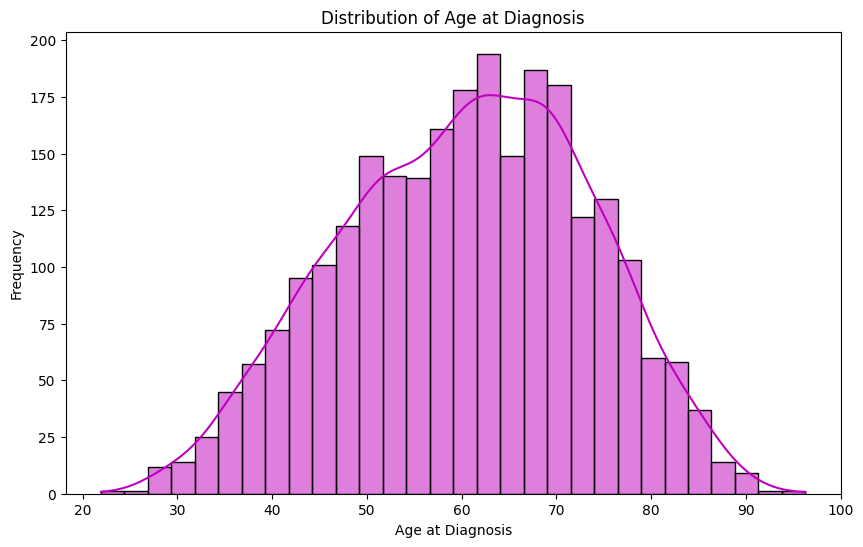

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Age at Diagnosis
plt.figure(figsize=(10, 6))
sns.histplot(df['Age at Diagnosis'].dropna(), kde=True, bins=30,color='m')
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.show()

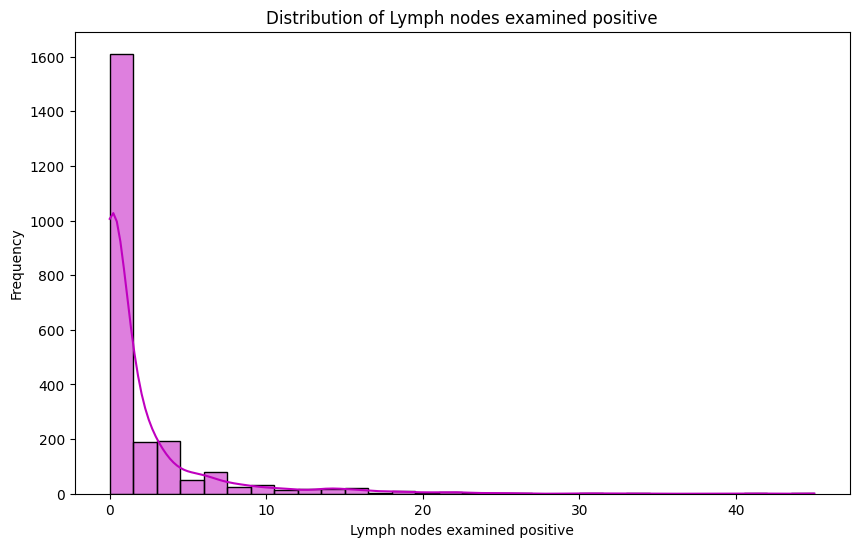

In [24]:
# Plot for Lymph nodes examined positive
plt.figure(figsize=(10, 6))
sns.histplot(df['Lymph nodes examined positive'].dropna(), kde=True, bins=30,color='m')
plt.title('Distribution of Lymph nodes examined positive')
plt.xlabel('Lymph nodes examined positive')
plt.ylabel('Frequency')
plt.show()

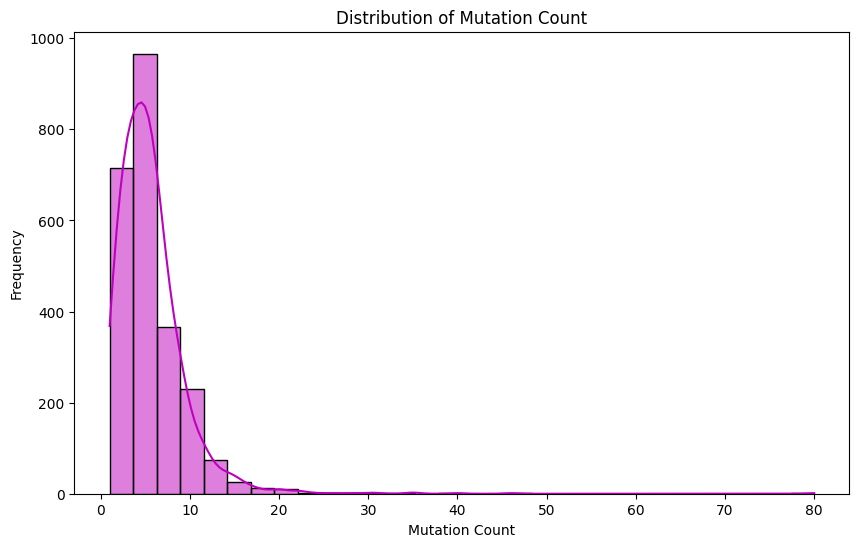

In [25]:
# Plot for Mutation Count
plt.figure(figsize=(10, 6))
sns.histplot(df['Mutation Count'].dropna(), kde=True, bins=30,color='m')
plt.title('Distribution of Mutation Count')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')
plt.show()

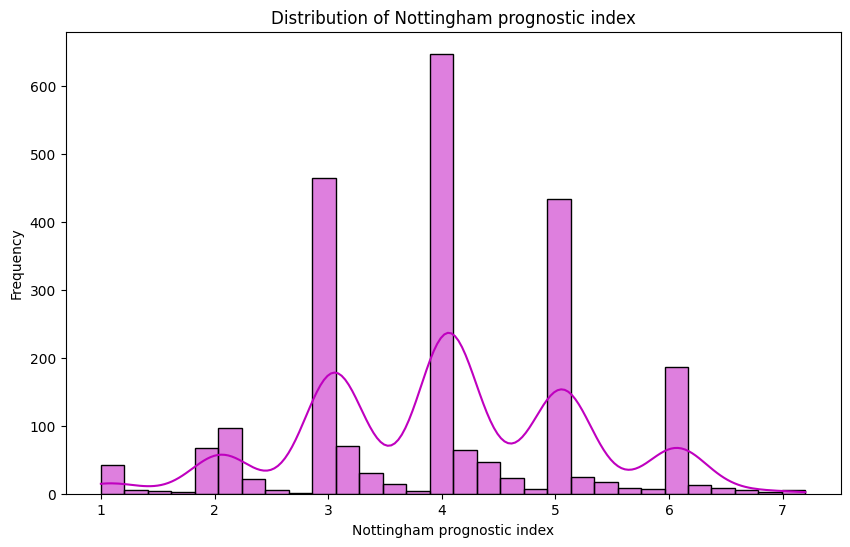

In [26]:
# Plot for Nottingham prognostic index
plt.figure(figsize=(10, 6))
sns.histplot(df['Nottingham prognostic index'].dropna(), kde=True, bins=30,color='m')
plt.title('Distribution of Nottingham prognostic index')
plt.xlabel('Nottingham prognostic index')
plt.ylabel('Frequency')
plt.show()

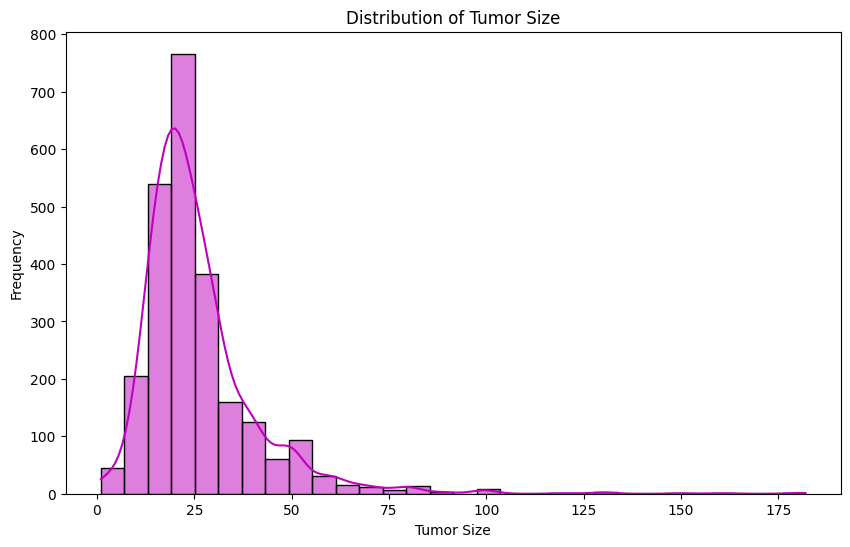

In [27]:
# Plot for Tumor Size
plt.figure(figsize=(10, 6))
sns.histplot(df['Tumor Size'].dropna(), kde=True, bins=30,color='m')
plt.title('Distribution of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.show()

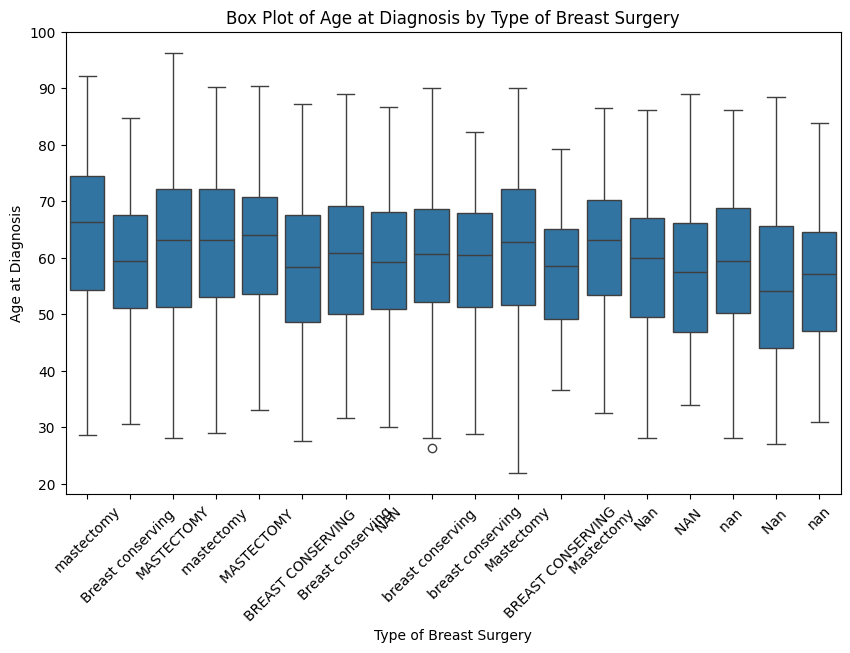

In [28]:

df['Type of Breast Surgery'] = df['Type of Breast Surgery'].str.replace(r'\$', '', regex=True)

# Box Plot for Type of Breast Surgery
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of Breast Surgery', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by Type of Breast Surgery')
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

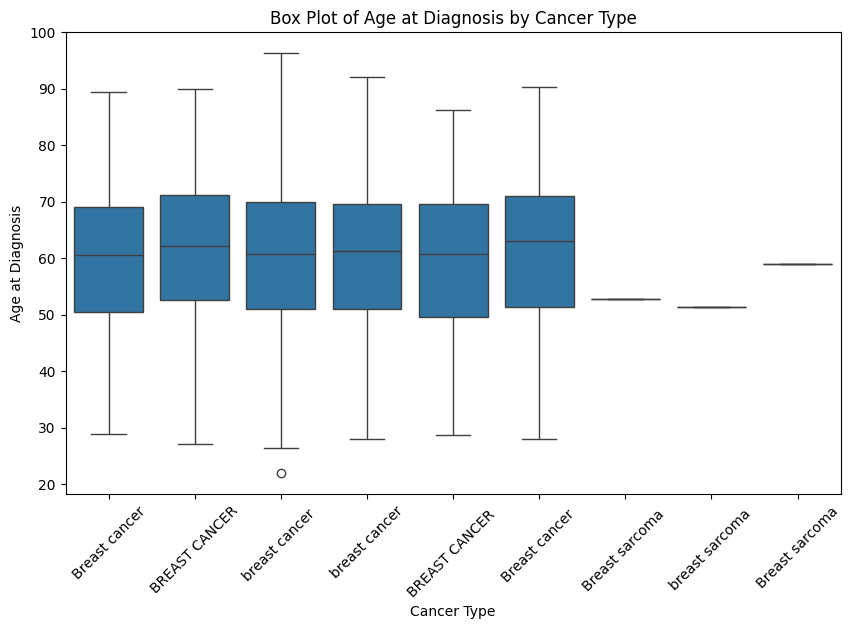

In [29]:
# Clean the 'Cancer Type' column
df['Cancer Type'] = df['Cancer Type'].str.replace(r'\$', '', regex=True)

# Box Plot for Cancer Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer Type', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

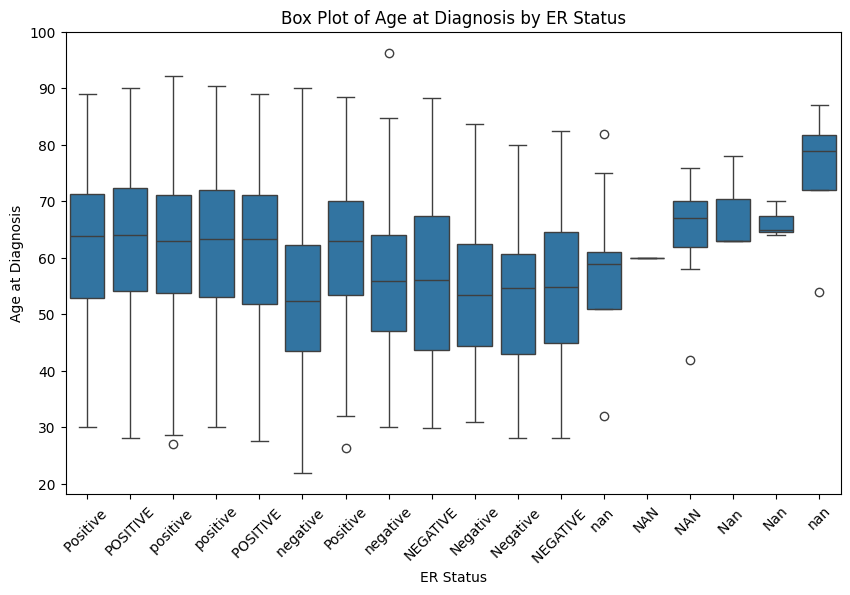

In [30]:
# Clean the 'ER Status' column
df['ER Status'] = df['ER Status'].str.replace(r'\$', '', regex=True)

# Box Plot for ER Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='ER Status', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by ER Status')
plt.xlabel('ER Status')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

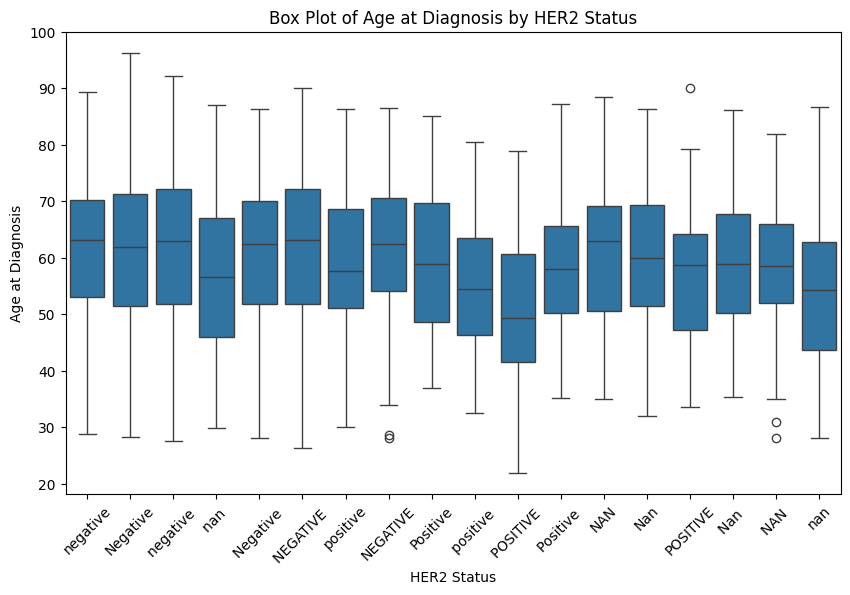

In [31]:
# Clean the 'HER2 Status' column
df['HER2 Status'] = df['HER2 Status'].str.replace(r'\$', '', regex=True)

# Box Plot for HER2 Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='HER2 Status', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by HER2 Status')
plt.xlabel('HER2 Status')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

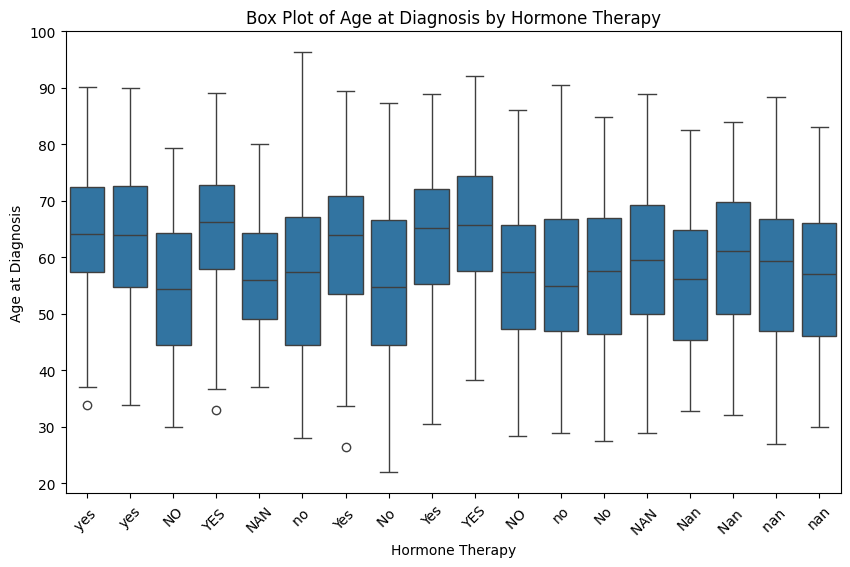

In [32]:
# Clean the 'Hormone Therapy' column
df['Hormone Therapy'] = df['Hormone Therapy'].str.replace(r'\$', '', regex=True)

# Box Plot for Hormone Therapy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hormone Therapy', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by Hormone Therapy')
plt.xlabel('Hormone Therapy')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

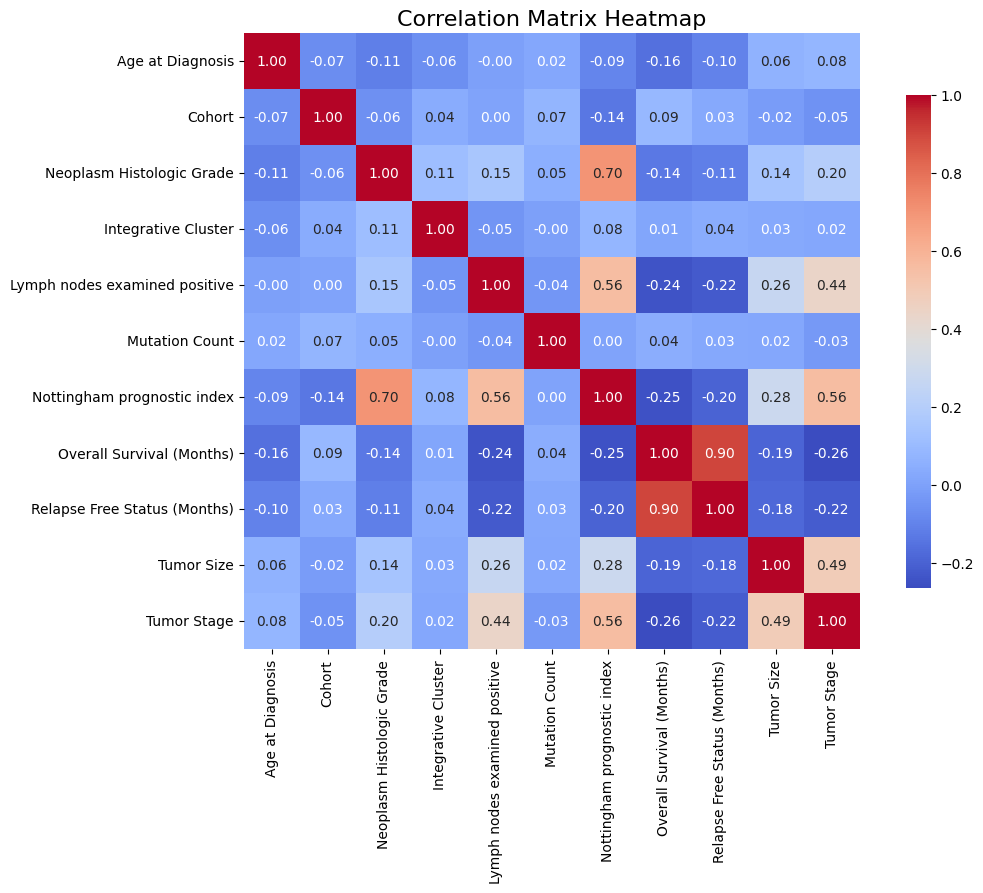

In [33]:
# Convert columns to numeric, forcing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values
df_numeric = df_numeric.dropna(axis=1, how='all')

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

<h1>Analysis of correlation results (sample analysis) 🔍</h1>
1. Age at Diagnosis and Tumor Size: The correlation is 0.06, which indicates a negligible positive correlation, not strong as mentioned.


2. Lymph Nodes Examined Positive and Tumor Size: The correlation is 0.26, reflecting a weak positive relationship rather than moderate.


3. Nottingham Prognostic Index and Overall Survival: The correlation is -0.25, which shows a negative correlation, meaning a higher prognostic index is associated with worse overall survival.


4. Neoplasm Histologic Grade and Tumor Size: The correlation is 0.14, indicating a weak positive correlation, not moderate.


5. Overall Survival and Relapse-Free Status: The correlation is 0.90, which represents a very strong positive correlation, not moderate.


6. Mutation Count and Tumor Size: The correlation is 0.03, showing a negligible positive relationship.


7. Neoplasm Histologic Grade and Relapse-Free Status: The correlation is -0.14, indicating a weak negative correlation rather than moderate.


8. Integrative Cluster: Generally, the correlations are weak with all variables, such as 0.01 with Age at Diagnosis, 0.11 with Neoplasm Histologic Grade, and other low values.



<h1>Conclusion:📈</h1>

1.Data cleaning is essential, especially for categorical columns with inconsistent values.

2.Missing data must be handled to improve analysis quality.

3.The visualizations highlighted significant patterns, such as the relationship between age, survival duration, and treatment types, providing deeper insights into the dataset.


<h1>Data Preprocessing🧹📊</h1>

In [34]:
from scipy.stats import skew
outlier_cols = []
skewed_cols = []
both_cols = []
no_issue_cols = []


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    col_skewness = skew(df[col].dropna())

    if outliers > 0:
        outlier_cols.append(col)  
    if abs(col_skewness) > 0.5:
        skewed_cols.append(col)  

    if outliers > 0 and abs(col_skewness) > 0.5:
        both_cols.append(col)  
    if outliers == 0 and abs(col_skewness) <= 0.5:
        no_issue_cols.append(col)  
        
print("Columns with Outliers:", outlier_cols, "\n")
print("Columns with Skewness:", skewed_cols, "\n")
print("Columns with Both Outliers and Skewness:", both_cols, "\n")
print("Columns with No Outliers or Skewness:", no_issue_cols, "\n")

Columns with Outliers: ['Age at Diagnosis', 'Cohort', 'Lymph nodes examined positive', 'Mutation Count', 'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage'] 

Columns with Skewness: ['Cohort', 'Neoplasm Histologic Grade', 'Lymph nodes examined positive', 'Mutation Count', 'Relapse Free Status (Months)', 'Tumor Size'] 

Columns with Both Outliers and Skewness: ['Cohort', 'Lymph nodes examined positive', 'Mutation Count', 'Relapse Free Status (Months)', 'Tumor Size'] 

Columns with No Outliers or Skewness: ['Nottingham prognostic index', 'Overall Survival (Months)'] 



In [35]:
print(df.isnull().sum())

Patient ID                          0
Age at Diagnosis                   81
Type of Breast Surgery             74
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                        79
Chemotherapy                       81
Pam50 + Claudin-low subtype        59
Cohort                             80
ER status measured by IHC          16
ER Status                           5
Neoplasm Histologic Grade         193
HER2 status measured by SNP6       76
HER2 Status                        68
Tumor Other Histologic Subtype     19
Hormone Therapy                    77
Inferred Menopausal State          67
Integrative Cluster                70
Primary Tumor Laterality           83
Lymph nodes examined positive     346
Mutation Count                    221
Nottingham prognostic index       300
Oncotree Code                       0
Overall Survival (Months)         613
Overall Survival Status            89
PR Status                          59
Radio Therap

In [40]:
import numpy as np
import pandas as pd
df.replace(['NAN', 'Nan', '$$NAN', 'nan', '$$nan', '', ' ', 'NaN'], np.nan, inplace=True)

In [41]:
print(df.isnull().sum())

Patient ID                          0
Age at Diagnosis                   81
Type of Breast Surgery            297
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       283
Chemotherapy                      248
Pam50 + Claudin-low subtype       239
Cohort                             80
ER status measured by IHC          40
ER Status                          14
Neoplasm Histologic Grade         193
HER2 status measured by SNP6      246
HER2 Status                       268
Tumor Other Histologic Subtype     64
Hormone Therapy                   268
Inferred Menopausal State         242
Integrative Cluster               239
Primary Tumor Laterality          260
Lymph nodes examined positive     346
Mutation Count                    221
Nottingham prognostic index       300
Oncotree Code                       0
Overall Survival (Months)         613
Overall Survival Status           264
PR Status                         238
Radio Therap

In [42]:
unique_values = df['Integrative Cluster'].unique()
print(unique_values)

['4er+ ' '$$4er+' '3 ' '9 ' '$$7' '$$3' '4ER- ' '3' nan '9' '4ER+ ' '4er-'
 '$$5' '8' '10' '1' '10 ' '7' '8 ' '2' '$$10' '$$1' '$$9' '5' '6 ' '1 '
 '7 ' '$$8' '5 ' '2 ' '4er+' '4ER-' '$$4er-' '4er- ' '$$6' '$$4ER+'
 '$$4ER-' '4ER+' '$$2' 'NAN ' 'nan ' '6' '$$Nan' 'Nan ']


In [43]:
df['Integrative Cluster'] = df['Integrative Cluster'].str.strip().str.lower()

replace_dict = {
    '$$4er+': 4, '4er-': 4, '4er+': 4, '4er- ': 4, '4er+ ': 4,
    '$$4er-': 4, '$$4er+': 4, '4er ': 4, '4er': 4, '4er': 4,
    '4er+ ': 4, '4er- ': 4, '$$4er+': 4, '$$4er-': 4,
    '4er+': 4, '4er-': 4, '$$7': 7, '$$3': 3, '$$5': 5,
    '$$6': 6, '$$2': 2, '$$1': 1, '$$nan': np.nan, 'nan ': np.nan,
    'nan': np.nan, '<na>': np.nan, 'nan ': np.nan, 'nan': np.nan
}

df['Integrative Cluster'] = df['Integrative Cluster'].replace(replace_dict)

print(df['Integrative Cluster'])

0         4
1         4
2         3
3         9
4         9
       ... 
2629    NaN
2630      1
2631    NaN
2632    NaN
2633    NaN
Name: Integrative Cluster, Length: 2634, dtype: object


In [44]:
unique_values = df['Integrative Cluster'].unique()
print(unique_values)

[4 '3' '9' 7 3 nan 5 '8' '10' '1' '7' '2' '$$10' 1 '$$9' '5' '6' '$$8' 6 2]


In [45]:
df['Integrative Cluster'] = df['Integrative Cluster'].str.strip().str.lower()

replace_dict = {
    '$$10': 10, '$$9': 9, '$$8':8, '6':6, '5':5, '1': 1, '2': 2,'3':3, '8':8,'9':9, '7':7
}

df['Integrative Cluster'] = df['Integrative Cluster'].replace(replace_dict)

print(df['Integrative Cluster'])

0       NaN
1       NaN
2         3
3         9
4         9
       ... 
2629    NaN
2630    NaN
2631    NaN
2632    NaN
2633    NaN
Name: Integrative Cluster, Length: 2634, dtype: object


In [46]:
unique_values = df['Integrative Cluster'].unique()
print(unique_values)

[nan 3 9 8 '10' 1 7 2 10 5 6]


In [47]:
df['Integrative Cluster'] = df['Integrative Cluster'].str.strip().str.lower()

replace_dict = {
    '10': 10
}

df['Integrative Cluster'] = df['Integrative Cluster'].replace(replace_dict)

print(df['Integrative Cluster'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2629   NaN
2630   NaN
2631   NaN
2632   NaN
2633   NaN
Name: Integrative Cluster, Length: 2634, dtype: float64


In [48]:
unique_values = df['Type of Breast Surgery'].unique()
print(unique_values)

['mastectomy' 'Breast conserving ' 'MASTECTOMY' 'mastectomy '
 'MASTECTOMY ' 'BREAST CONSERVING ' 'Breast conserving' nan
 'breast conserving ' 'breast conserving' 'Mastectomy' 'BREAST CONSERVING'
 'Mastectomy ' 'NAN ' 'nan ' 'Nan ']


In [49]:
df['Type of Breast Surgery'] = df['Type of Breast Surgery'].str.strip().str.lower()

replace_dict = {
    'mastectomy': 'Mastectomy', 
    'mastectomy ': 'Mastectomy', 
    '$$mastectomy': 'Mastectomy', 
    'mastctomy': 'Mastectomy',
    'breast conserving': 'Breast conserving', 
    'breast conserving ': 'Breast conserving', 
    '$$breast conserving': 'Breast conserving',
    '$$nan': np.nan, 'nan ': np.nan, 'nan': np.nan, 
    '<na>': np.nan, 'nan ': np.nan, '': np.nan, ' ': np.nan, '<NA>' : np.nan,  ' <NA>' : np.nan, '<NA> ' : np.nan
}

df['Type of Breast Surgery'] = df['Type of Breast Surgery'].replace(replace_dict)


print(df['Type of Breast Surgery'])

0              Mastectomy
1       Breast conserving
2              Mastectomy
3              Mastectomy
4              Mastectomy
              ...        
2629                  NaN
2630    Breast conserving
2631                  NaN
2632                  NaN
2633                  NaN
Name: Type of Breast Surgery, Length: 2634, dtype: object


In [50]:
unique_values = df['Type of Breast Surgery'].unique()
print(unique_values)

['Mastectomy' 'Breast conserving' nan]


In [51]:
unique_values = df['Cancer Type'].unique()
print(unique_values)

['Breast cancer' 'BREAST CANCER' 'breast cancer ' 'breast cancer'
 'BREAST CANCER ' 'Breast cancer ' 'Breast sarcoma ' 'breast sarcoma '
 'Breast sarcoma']


In [52]:
df['Cancer Type'] = df['Cancer Type'].str.strip().str.lower()

replace_dict = {
    '$$breast cancer': 'Breast cancer', 
    'breast cancer ': 'Breast cancer', 
    'breast cancer': 'Breast cancer', 
    'breast sarcoma ': 'Breast sarcoma', 
    'breast sarcoma': 'Breast sarcoma', 
    'breast cancer': 'Breast cancer', 
    '$$nan': np.nan, 'nan ': np.nan, 'nan': np.nan, 
    '<na>': np.nan, '': np.nan, ' ': np.nan
}

df['Cancer Type'] = df['Cancer Type'].replace(replace_dict)


print(df['Cancer Type'])

0       Breast cancer
1       Breast cancer
2       Breast cancer
3       Breast cancer
4       Breast cancer
            ...      
2629    Breast cancer
2630    Breast cancer
2631    Breast cancer
2632    Breast cancer
2633    Breast cancer
Name: Cancer Type, Length: 2634, dtype: object


In [53]:
unique_values = df['Cancer Type'].unique()
print(unique_values)

['Breast cancer' 'Breast sarcoma']


In [54]:
unique_values = df['Cancer Type Detailed'].unique()
print(unique_values)

['$$breast invasive ductal carcinoma' '$$Breast invasive ductal carcinoma'
 'breast invasive ductal carcinoma '
 '$$Breast mixed ductal and lobular carcinoma'
 'BREAST INVASIVE DUCTAL CARCINOMA' 'breast invasive lobular carcinoma '
 'breast mixed ductal and lobular carcinoma '
 'Breast invasive ductal carcinoma'
 'BREAST MIXED DUCTAL AND LOBULAR CARCINOMA '
 'BREAST INVASIVE DUCTAL CARCINOMA ' 'breast invasive ductal carcinoma'
 'INVASIVE BREAST CARCINOMA' '$$BREAST INVASIVE LOBULAR CARCINOMA'
 '$$BREAST INVASIVE DUCTAL CARCINOMA' 'Breast invasive lobular carcinoma '
 'Breast invasive lobular carcinoma' 'Breast invasive ductal carcinoma '
 'INVASIVE BREAST CARCINOMA ' '$$Breast invasive lobular carcinoma'
 'breast invasive lobular carcinoma'
 'breast mixed ductal and lobular carcinoma'
 '$$BREAST MIXED DUCTAL AND LOBULAR CARCINOMA'
 'BREAST MIXED DUCTAL AND LOBULAR CARCINOMA'
 '$$breast invasive lobular carcinoma'
 'Breast mixed ductal and lobular carcinoma ' 'invasive breast carcinoma

In [55]:
df['Cancer Type Detailed'] = df['Cancer Type Detailed'].str.strip()  
df['Cancer Type Detailed'] = df['Cancer Type Detailed'].str.lower()  
df['Cancer Type Detailed'] = df['Cancer Type Detailed'].str.replace(r'^\$\$', '', regex=True)  


df['Cancer Type Detailed'].unique()

array(['breast invasive ductal carcinoma',
       'breast mixed ductal and lobular carcinoma',
       'breast invasive lobular carcinoma', 'invasive breast carcinoma',
       'breast invasive mixed mucinous carcinoma', 'breast angiosarcoma',
       'breast', 'metaplastic breast cancer'], dtype=object)

In [56]:
unique_values = df['Cellularity'].unique()
print(unique_values)

[nan '$$high' 'HIGH ' 'moderate ' 'Moderate' 'MODERATE ' 'High'
 'Moderate ' 'High ' 'low ' 'high ' 'HIGH' '$$moderate' 'high' 'moderate'
 'LOW ' '$$LOW' '$$High' 'Low' 'LOW' '$$low' 'low' '$$MODERATE' '$$Nan'
 '$$Low' 'NAN ' '$$HIGH' 'nan ' '$$Moderate' 'Low ' 'Nan ' 'MODERATE']


In [57]:
df['Cellularity'] = df['Cellularity'].str.strip().str.lower()

replace_dict = {
    '$$high': 'High', 
    'high ': 'High', 
    'high': 'High', 
    'high ': 'High', 
    'high': 'High', 
    '$$high': 'High', 
    '$$high': 'High', 
    'moderate ': 'Moderate', 
    'moderate': 'Moderate', 
    '$$moderate': 'Moderate', 
    '$$moderate': 'Moderate', 
    'moderate': 'Moderate', 
    'low ': 'Low', 
    'low': 'Low', 
    '$$low': 'Low', 
    'low': 'Low', 
    '$$low': 'Low', 
    'low': 'Low',
    '$$nan': np.nan, 'nan ': np.nan, 'nan': np.nan, 
    '<na>': np.nan, '': np.nan, ' ': np.nan
}

df['Cellularity'] = df['Cellularity'].replace(replace_dict)

print(df['Cellularity'])


0            NaN
1           High
2           High
3       Moderate
4           High
          ...   
2629         NaN
2630        High
2631         NaN
2632         NaN
2633         NaN
Name: Cellularity, Length: 2634, dtype: object


In [58]:
unique_values = df['Cellularity'].unique()
print(unique_values)

[nan 'High' 'Moderate' 'Low']


In [59]:
unique_values = df['Chemotherapy'].unique()
print(unique_values)

['$$no' 'no' 'YES ' 'yes' '$$yes' 'no ' '$$Yes' '$$No' nan 'No ' 'Yes '
 'NO' 'No' 'yes ' 'NO ' '$$YES' '$$NO' 'YES' 'NAN ' 'Yes' 'nan ' 'Nan '
 '$$Nan']


In [60]:
df['Chemotherapy'] = df['Chemotherapy'].str.strip().str.lower()

replace_dict = {
    '$$yes': 'Yes', 
    'yes ': 'Yes', 
    'yes': 'Yes', 
    '$$yes': 'Yes', 
    '$$yes': 'Yes', 
    'yes ': 'Yes', 
    '$$yes': 'Yes', 
    'YES': 'Yes', 
    '$$no': 'No', 
    'no': 'No', 
    'no ': 'No', 
    '$$no': 'No', 
    'No ': 'No', 
    'NO': 'No', 
    'NO ': 'No', 
    '$$NO': 'No',
    '$$nan': np.nan, 'nan ': np.nan, 'nan': np.nan, 
    '<na>': np.nan, '': np.nan, ' ': np.nan
}

df['Chemotherapy'] = df['Chemotherapy'].replace(replace_dict)

print(df['Chemotherapy'])

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
2629    NaN
2630    Yes
2631    NaN
2632    NaN
2633    NaN
Name: Chemotherapy, Length: 2634, dtype: object


In [61]:
unique_values = df['Chemotherapy'].unique()
print(unique_values)

['No' 'Yes' nan]


In [62]:
unique_values = df['Pam50 + Claudin-low subtype'].unique()
print(unique_values)

['$$Claudin-low' 'Luma ' '$$lumb' 'LUMB ' 'Lumb ' '$$Lumb' '$$normal'
 'CLAUDIN-LOW ' nan 'her2' '$$Luma' 'lumb' 'claudin-low ' '$$luma'
 '$$claudin-low' 'normal ' 'lumb ' 'Lumb' 'LUMA ' 'basal' 'LUMA' 'HER2 '
 'luma ' '$$LUMB' 'Basal ' 'NORMAL' 'LUMB' '$$CLAUDIN-LOW' 'claudin-low'
 'luma' 'HER2' 'Luma' '$$LUMA' '$$her2' 'basal ' 'Normal' 'normal'
 'Claudin-low' 'Her2 ' 'NORMAL ' 'Basal' '$$Basal' 'her2 ' 'Claudin-low '
 'CLAUDIN-LOW' 'BASAL' 'BASAL ' 'Normal ' 'nan ' 'NAN ' 'Her2' '$$HER2'
 '$$basal' '$$NORMAL' '$$Normal' 'NC ' '$$Her2' 'nc ' '$$nc' '$$BASAL'
 'Nc' 'Nan ' '$$Nan']


In [65]:
df['Pam50 + Claudin-low subtype'] = df['Pam50 + Claudin-low subtype'].str.strip()


replace_dict = {
    '$$Claudin-low': 'Claudin-low',
    'CLAUDIN-LOW ': 'Claudin-low',
    'claudin-low ': 'Claudin-low',
    '$$claudin-low': 'Claudin-low',
    '$$CLAUDIN-LOW': 'Claudin-low',
    'claudin-low': 'Claudin-low',
    'Claudin-low': 'Claudin-low',
    'Claudin-low ': 'Claudin-low',
    'CLAUDIN-LOW': 'Claudin-low',
    'Luma ': 'Luma',
    '$$luma': 'Luma',
    'LUMA ': 'Luma',
    'LUMA': 'Luma',
    'luma ': 'Luma',
    'luma': 'Luma',
    '$$LUMA': 'Luma',
    '$$Luma': 'Luma',
    '$$lumb': 'Lumb',
    'LUMB ': 'Lumb',
    'Lumb ': 'Lumb',
    '$$Lumb': 'Lumb',
    'lumb': 'Lumb',
    'lumb ': 'Lumb',
    'LUMB': 'Lumb',
    '$$LUMB': 'Lumb',
    '$$normal': 'Normal',
    'normal ': 'Normal',
    'NORMAL': 'Normal',
    'normal': 'Normal',
    'NORMAL ': 'Normal',
    'Normal ': 'Normal',
    '$$NORMAL': 'Normal',
    '$$Normal': 'Normal',
    'HER2 ': 'HER2',
    '$$her2': 'HER2',
    'Her2 ': 'HER2',
    'her2 ': 'HER2',
    'Her2': 'HER2',
    '$$HER2': 'HER2',
    '$$Her2': 'HER2',
    'her2': 'HER2',
    'her2': 'HER2',
    'basal': 'Basal',
    'Basal ': 'Basal',
    'basal ': 'Basal',
    '$$Basal': 'Basal',
    'BASAL': 'Basal',
    'BASAL ': 'Basal',
    '$$basal': 'Basal',
    '$$BASAL': 'Basal',
    'NC ': 'NC',
    'nc ': 'NC',
    'nc' : 'NC',
    '$$nc': 'NC',
    'Nc': 'NC',
    'nan': np.nan,
    'NAN': np.nan,
    'Nan': np.nan,
    '$$Nan': np.nan
}

df['Pam50 + Claudin-low subtype'] = df['Pam50 + Claudin-low subtype'].replace(replace_dict)

print(df['Pam50 + Claudin-low subtype'])

0       Claudin-low
1              Luma
2              Lumb
3              Lumb
4              Lumb
           ...     
2629            NaN
2630           Lumb
2631            NaN
2632            NaN
2633            NaN
Name: Pam50 + Claudin-low subtype, Length: 2634, dtype: object


In [66]:
unique_values = df['Pam50 + Claudin-low subtype'].unique()
print(unique_values)

['Claudin-low' 'Luma' 'Lumb' 'Normal' nan 'HER2' 'Basal' 'NC']


In [67]:
unique_values = df['ER status measured by IHC'].unique()
print(unique_values)

['Positve ' 'POSITVE' '$$positve' 'POSITVE ' 'positve ' 'negative '
 '$$POSITVE' 'Positve' 'NEGATIVE' 'NEGATIVE ' 'positve' '$$NEGATIVE'
 '$$Positve' '$$negative' 'nan ' 'Negative ' 'negative' '$$Negative'
 '$$Nan' 'NAN ' nan 'Negative' 'Nan ']


In [68]:
df['ER status measured by IHC'] = df['ER status measured by IHC'].replace({
    'Positve ': 'Positive',
    'POSITVE': 'Positive',
    '$$positve': 'Positive',
    'POSITVE ': 'Positive',
    'positve ': 'Positive',
    '$$POSITVE': 'Positive',
    'Positve': 'Positive',
    'positve': 'Positive',
    '$$Positve': 'Positive',
    'negative ': 'Negative',
    'NEGATIVE': 'Negative',
    'NEGATIVE ': 'Negative',
    '$$NEGATIVE': 'Negative',
    '$$negative': 'Negative',
    'Negative ': 'Negative',
    'negative': 'Negative',
    '$$Negative': 'Negative',
    'nan': np.nan,
    'NAN': np.nan,
    'Nan': np.nan,
    '$$Nan': np.nan,
    'NAN ' : np.nan,
    '$$nan' : np.nan,
    'Nan ' : np.nan,
    '$$NAN' : np.nan,
    'nan ': np.nan
})

print(df['ER status measured by IHC'])

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
2629    Negative
2630    Positive
2631    Negative
2632    Positive
2633    Positive
Name: ER status measured by IHC, Length: 2634, dtype: object


In [69]:
unique_values = df['ER status measured by IHC'].unique()
print(unique_values)

['Positive' 'Negative' nan]


In [70]:
unique_values = df['ER Status'].unique()
print(unique_values)

['Positive ' 'POSITIVE' 'positive ' 'positive' 'POSITIVE ' 'negative '
 'Positive' 'negative' 'NEGATIVE' 'Negative' 'Negative ' 'NEGATIVE ' nan
 'nan ' 'NAN ' 'Nan ']


In [71]:
df['ER Status'] = df['ER Status'].replace({
    'negative ': 'Negative',
    'Positive': 'Positive',
    '$$POSITIVE' : 'Positive',
    '$$positive' : 'Positive',
    'positive': 'Positive',
    'POSITIVE' : 'Positive',
    'POSITIVE ': 'Positive',
    'Positive ': 'Positive',
    'positive ':'Positive',
    '$$negative': 'Negative',
    '$$NEGATIVE': 'Negative',
    'Negative': 'Negative',
    '$$Positive': 'Positive',
    'Negative ': 'Negative',
    'negative': 'Negative',
    'NEGATIVE': 'Negative',
    'NEGATIVE ': 'Negative',
    '$$Negative': 'Negative',
    'nan': np.nan,
    'nan ': np.nan,
    '$$NAN': np.nan,
    'NAN ':np.nan,
    'Nan ': np.nan,
    '$$Nan': np.nan,
    '$$nan': np.nan,
    'Nan': np.nan
})

print(df['ER Status'])

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
2629    Negative
2630    Positive
2631    Negative
2632    Positive
2633    Positive
Name: ER Status, Length: 2634, dtype: object


In [72]:
unique_values = df['ER Status'].unique()
print(unique_values)

['Positive' 'Negative' nan]


In [73]:
unique_values = df['HER2 status measured by SNP6'].unique()
print(unique_values)

['$$Neutral' 'neutral ' 'Neutral ' 'NEUTRAL ' 'neutral' 'LOSS ' 'NEUTRAL'
 '$$NEUTRAL' nan 'GAIN ' 'loss' 'gain' 'gain ' 'Neutral' '$$loss'
 '$$neutral' '$$gain' 'Gain' 'loss ' '$$Loss' 'Loss ' '$$LOSS' '$$Gain'
 'GAIN' 'Gain ' '$$GAIN' 'NAN ' 'LOSS' '$$Nan' 'Loss' 'undef ' '$$UNDEF'
 '$$Undef' 'Undef ' '$$undef' 'Nan ' 'nan ']


In [78]:
df['HER2 status measured by SNP6'] = df['HER2 status measured by SNP6'].replace({
    '$$Neutral': 'Neutral',
    'neutral': 'Neutral',
    'Neutral': 'Neutral',
    'NEUTRAL': 'Neutral',
    'LOSS': 'Loss',
    '$$NEUTRAL': 'Neutral',
    'nan': 'NaN',
    'GAIN': 'Gain',
    'loss': 'Loss',
    'gain': 'Gain',
    '$$loss': 'Loss',
    '$$Neutral': 'Neutral',
    '$$neutral': 'Neutral',
    '$$gain': 'Gain',
    'Gain': 'Gain',
    'GAIN': 'Gain',
    'Neutral ': 'Neutral',
    'neutral ': 'Neutral',
    'Loss ': 'Loss',
    '$$Loss': 'Loss',
    '$$LOSS':'Loss',
    'loss ': 'Loss',
    'LOSS ':'Loss',
    'gain ': 'Gain',
    'GAIN ':'Gain',
    '$$Gain': 'Gain',
    'Gain ':'Gain',
    '$$GAIN': 'Gain',
    'NEUTRAL ': 'Neutral',
    'undef ': 'Undef',
    '$$UNDEF': 'Undef',
    '$$Undef': 'Undef',
    'Undef ': 'Undef',
    '$$undef': 'Undef',
    'nan': np.nan,
    'nan ': np.nan,
    '$$NAN': np.nan,
    'NAN ':np.nan,
    'Nan ': np.nan,
    '$$Nan': np.nan,
    '$$nan': np.nan,
    'Nan': np.nan,
    'NAN': np.nan
    
})

print(df['HER2 status measured by SNP6'])

0       Neutral
1       Neutral
2       Neutral
3       Neutral
4       Neutral
         ...   
2629        NaN
2630    Neutral
2631        NaN
2632        NaN
2633        NaN
Name: HER2 status measured by SNP6, Length: 2634, dtype: object


In [79]:
unique_values = df['HER2 status measured by SNP6'].unique()
print(unique_values)

['Neutral' 'Loss' nan 'Gain' 'Undef']


In [80]:
unique_values = df['HER2 Status'].unique()
print(unique_values)

['negative' 'Negative' 'negative ' 'nan ' 'Negative ' 'NEGATIVE '
 'positive' 'NEGATIVE' 'Positive' 'positive ' 'POSITIVE ' 'Positive ' nan
 'POSITIVE' 'Nan ' 'NAN ']


In [83]:

df['HER2 Status'] = df['HER2 Status'].replace({
    '$$negative': 'Negative',
    '$$Negative': 'Negative',
    'negative': 'Negative',
    'negative ': 'Negative',
    'Negative ': 'Negative',
    'NEGATIVE ': 'Negative',
    'NEGATIVE': 'Negative',
    '$$positive': 'Positive',
    '$$Positive': 'Positive',
    'positive': 'Positive',
    'positive ': 'Positive',
    'POSITIVE ': 'Positive',
    'POSITIVE': 'Positive',
    '$$NEGATIVE': 'Negative',
    '$$Positive': 'Positive',
    'Positive': 'Positive',
    'Positive ': 'Positive',
    '$$NAN': np.nan,
    '$$Nan': np.nan,
    '$$POSITIVE': 'Positive',
    'POSITIVE': 'Positive',
    'Positive': 'Positive',
    'Nan ': np.nan,
    'NAN ': np.nan,
    'NAN': np.nan,
    '$$nan': np.nan,
    'nan': np.nan,
    'Nan': np.nan,
    'nan ': np.nan
})


print(df['HER2 Status'])

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
2629         NaN
2630    Negative
2631         NaN
2632         NaN
2633         NaN
Name: HER2 Status, Length: 2634, dtype: object


In [85]:
! pip install  seaborn

In [86]:
df['HER2 Status'] = df['HER2 Status'].replace({
    '$$negative': 'Negative',
    '$$Negative': 'Negative',
    'negative': 'Negative',
    'negative ': 'Negative',
    'Negative ': 'Negative',
    'NEGATIVE ': 'Negative',
    'NEGATIVE': 'Negative',
    '$$positive': 'Positive',
    '$$Positive': 'Positive',
    'positive': 'Positive',
    'positive ': 'Positive',
    'POSITIVE ': 'Positive',
    'POSITIVE': 'Positive',
    '$$NEGATIVE': 'Negative',
    '$$Positive': 'Positive',
    'Positive': 'Positive',
    'Positive ': 'Positive',
    '$$NAN': np.nan,
    '$$Nan': np.nan,
    '$$POSITIVE': 'Positive',
    'POSITIVE': 'Positive',
    'Positive': 'Positive',
    'Nan ': np.nan,
    'NAN ': np.nan,
    'NAN': np.nan,
    '$$nan': np.nan,
    'nan': np.nan,
    'Nan': np.nan,
    'nan ': np.nan
})
print(df['HER2 Status']) 
df['HER2 Status'] = df['HER2 Status'].replace({
    '$$negative': 'Negative',
    '$$Negative': 'Negative',
    'negative': 'Negative',
    'negative ': 'Negative',
    'Negative ': 'Negative',
    'NEGATIVE ': 'Negative',
    'NEGATIVE': 'Negative',
    '$$positive': 'Positive',
    '$$Positive': 'Positive',
    'positive': 'Positive',
    'positive ': 'Positive',
    'POSITIVE ': 'Positive',
    'POSITIVE': 'Positive',
    '$$NEGATIVE': 'Negative',
    '$$Positive': 'Positive',
    'Positive': 'Positive',
    'Positive ': 'Positive',
    '$$NAN': np.nan,
    '$$Nan': np.nan,
    '$$POSITIVE': 'Positive',
    'POSITIVE': 'Positive',
    'Positive': 'Positive',
    'Nan ': np.nan,
    'NAN ': np.nan,
    'NAN': np.nan,
    '$$nan': np.nan,
    'nan': np.nan,
    'Nan': np.nan,
    'nan ': np.nan
})


print(df['HER2 Status'])

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
2629         NaN
2630    Negative
2631         NaN
2632         NaN
2633         NaN
Name: HER2 Status, Length: 2634, dtype: object
0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
2629         NaN
2630    Negative
2631         NaN
2632         NaN
2633         NaN
Name: HER2 Status, Length: 2634, dtype: object


In [87]:
unique_values = df['Tumor Other Histologic Subtype'].unique()
print(unique_values)

['ductal/nst ' '$$ductal/nst' 'mixed ' '$$mixed' 'DUCTAL/NST '
 'Ductal/nst ' 'lobular ' '$$Ductal/nst' 'ductal/nst' 'Ductal/nst'
 '$$MIXED' 'MIXED ' '$$DUCTAL/NST' 'TUBULAR/ CRIBRIFORM ' 'nan ' 'LOBULAR'
 '$$lobular' nan 'MIXED' 'DUCTAL/NST' 'LOBULAR ' 'Tubular/ cribriform '
 '$$tubular/ cribriform' 'mucinous ' 'lobular' 'Mixed ' 'MEDULLARY '
 'Medullary' 'NAN ' 'Lobular ' '$$mucinous' 'mixed' 'tubular/ cribriform '
 'Other ' '$$Mixed' 'METAPLASTIC ' 'MUCINOUS ' 'Mixed' '$$LOBULAR'
 'Medullary ' 'mucinous' '$$Mucinous' 'Mucinous ' 'medullary ' 'other'
 'Lobular' 'other ' 'Nan ' 'TUBULAR/ CRIBRIFORM' '$$MUCINOUS'
 'metaplastic ' '$$Lobular' 'tubular/ cribriform' 'Tubular/ cribriform'
 '$$MEDULLARY' 'medullary' 'OTHER ' '$$medullary' '$$other' 'OTHER'
 'MEDULLARY' '$$OTHER' '$$Other' '$$Nan' '$$Medullary' 'Other']


In [89]:
df['Tumor Other Histologic Subtype'] = df['Tumor Other Histologic Subtype'].replace({
    '$$ductal/nst': 'Ductal/nst',
    'ductal/nst ': 'Ductal/nst',
    'DUCTAL/NST ': 'Ductal/nst',
    'ductal/nst':'Ductal/nst',
    'Ductal/nst ': 'Ductal/nst',
    'Ductal/nst': 'Ductal/nst',
    '$$Ductal/nst': 'Ductal/nst',
    'lobular ': 'Lobular',
    'LOBULAR ': 'Lobular',
    'lobular': 'Lobular',
    '$$lobular': 'Lobular',
    'LOBULAR' :'Lobular',
    'MIXED ': 'Mixed',
    'mixed ': 'Mixed',
    'MIXED': 'Mixed',
    'mixed' : 'Mixed',
    '$$MIXED': 'Mixed',
    '$$mixed': 'Mixed',
    '$$DUCTAL/NST': 'Ductal/nst',
    'DUCTAL/NST': 'Ductal/nst',
    'TUBULAR/ CRIBRIFORM ': 'Tubular/cribriform',
    'Tubular/ cribriform': 'Tubular/cribriform',
    '$$tubular/ cribriform': 'Tubular/cribriform',
    'mucinous ': 'Mucinous',
    'MUCINOUS ': 'Mucinous',
    '$$mucinous': 'Mucinous',
    'mucinous': 'Mucinous',
    'Mixed': 'Mixed',
    'MEDULLARY ': 'Medullary',
    'Medullary': 'Medullary',
    'Mucinoous': 'Mucinous',
    'NAN ': np.nan,
    'nan ': np.nan,
    'nan': np.nan,
    '$$NAN': np.nan,
    'Nan ': np.nan,
    '$$Nan': np.nan,
    'OTHER ': 'Other',
    'other ': 'Other',
    'other': 'Other',
    '$$Mixed': 'Mixed',
    'Mixed ':'Mixed',
    '$$Medullary': 'Medullary',
    '$$Mucinous': 'Mucinous',
    '$$LOBULAR': 'Lobular',
    '$$Lobular': 'Lobular',
    'Other': 'Other',
    'TUBULAR/ CRIBRIFORM': 'Tubular/cribriform',
    'tubular/ cribriform':'Tubular/cribriform',
    'tubular/ cribriform ': 'Tubular/cribriform',
    'Tubular/ cribriform ':'Tubular/cribriform',
    'MEDULLARY': 'Medullary',
    '$$medullary': 'Medullary',
    '$$other': 'Other',
    '$$Other': 'Other',
    'Other ': 'Other',
    'OTHER': 'Other',
    '$$OTHER': 'Other',
    'Metaplastic ': 'Metaplastic',
    'metaplastic': 'Metaplastic',
    '$$Metaplastic': 'Metaplastic',
    '$$Tubular/cribriform': 'Tubular/cribriform',
    '$$medullary': 'Medullary',
    'Mucinous': 'Mucinous',
    '$$MUCINOUS': 'Mucinous',
    'METAPLASTIC ':'Mucinous',
    'metaplastic ': 'Mucinous',
    'Mucinous ': 'Mucinous',
    '$$MEDULLARY':'Medullary',
    'Medullary ': 'Medullary',
    'medullary ': 'Medullary',
    'medullary': 'Medullary',
    'Nan': np.nan,
    'Nan ': np.nan,
    '$$nan': np.nan,
    'NAN': np.nan,
    
})

print(df['Tumor Other Histologic Subtype'])

0       Ductal/nst
1       Ductal/nst
2       Ductal/nst
3            Mixed
4            Mixed
           ...    
2629    Ductal/nst
2630    Ductal/nst
2631    Ductal/nst
2632       Lobular
2633    Ductal/nst
Name: Tumor Other Histologic Subtype, Length: 2634, dtype: object


In [90]:
unique_values = df['Tumor Other Histologic Subtype'].unique()
print(unique_values)

['Ductal/nst' 'Mixed' 'Lobular' 'Tubular/cribriform' nan 'Mucinous'
 'Medullary' 'Lobular ' 'Other']


In [91]:
unique_values = df['Hormone Therapy'].unique()
print(unique_values)

['yes ' 'yes' 'NO' 'YES ' nan 'no ' 'Yes ' 'No ' 'Yes' 'YES' 'NO ' 'no'
 'No' 'NAN ' 'Nan ' 'nan ']


In [92]:
df['Hormone Therapy'] = df['Hormone Therapy'].replace({
    'yes ': 'Yes',
    'yes': 'Yes',
    '$$yes': 'Yes',
    'Yes ': 'Yes',
    'YES ': 'Yes',
    '$$Yes': 'Yes',
    'YES': 'Yes',
    'Yes': 'Yes',
    'no ': 'No',
    'no': 'No',
    '$$no': 'No',
    'No': 'No',
    'NO ': 'No',
    '$$No': 'No',
    'NO': 'No',
    '$$NO':'No',
    'No ':'No',
    '$$YES': 'Yes',
    '$$No': 'No',
    'nan': np.nan,
    'NAN ': np.nan,
    '$$NAN': np.nan,
    'NAN': np.nan,
    '$$Nan': np.nan,
    'Nan ': np.nan,
    'Nan': np.nan,
    '$$nan': np.nan,
    'nan ': np.nan
})

print(df['Hormone Therapy'])

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
2629    NaN
2630    Yes
2631    NaN
2632    NaN
2633    NaN
Name: Hormone Therapy, Length: 2634, dtype: object


In [93]:
unique_values = df['Hormone Therapy'].unique()
print(unique_values)

['Yes' 'No' nan]


In [94]:
unique_values = df['Inferred Menopausal State'].unique()
print(unique_values)

['post' '$$pre' 'PRE ' 'pre ' 'POST ' '$$POST' 'Post ' 'post ' '$$Nan'
 'Post' 'Pre' '$$Post' 'POST' 'PRE' '$$post' '$$Pre' 'Pre ' 'pre' '$$PRE'
 nan 'nan ' 'NAN ' 'Nan ']


In [95]:
df['Inferred Menopausal State'] = df['Inferred Menopausal State'].replace({
    'post': 'Post',
    'POST': 'Post',
    'Post': 'Post',
    'Post ': 'Post',
    '$$post': 'Post',
    '$$POST': 'Post',
    'post ': 'Post',
    'POST ': 'Post',
    '$$Post': 'Post',
    'PRE ': 'Pre',
    'pre ': 'Pre',
    'pre': 'Pre',
    'PRE': 'Pre',
    'Pre ': 'Pre',
    '$$Pre': 'Pre',
    '$$PRE': 'Pre',
    '$$pre': 'Pre',
    'nan': np.nan,
    'NAN ': np.nan,
    'Nan ': np.nan,
    'Nan': np.nan,
    '$$NAN': np.nan,
    '$$nan': np.nan,
    '$$Nan': np.nan,
    'nan ': np.nan,
    'NAN' : np.nan
})


print(df['Inferred Menopausal State'])

0       Post
1        Pre
2        Pre
3        Pre
4       Post
        ... 
2629     NaN
2630    Post
2631     NaN
2632     NaN
2633     NaN
Name: Inferred Menopausal State, Length: 2634, dtype: object


In [96]:
unique_values = df['Inferred Menopausal State'].unique()
print(unique_values)

['Post' 'Pre' nan]


In [97]:
unique_values = df['Primary Tumor Laterality'].unique()
print(unique_values)

['Right' '$$Right' 'Right ' 'right' 'left' 'right ' 'LEFT ' 'Left' nan
 'left ' 'RIGHT ' '$$LEFT' '$$left' 'Left ' 'NAN ' '$$right' '$$RIGHT'
 'nan ' '$$Left' 'LEFT' 'RIGHT' 'Nan ' '$$Nan']


In [98]:
df['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].replace({
    'Right': 'Right',
    '$$Right': 'Right',
    'Right ': 'Right',
    'right': 'Right',
    'RIGHT': 'Right',
    '$$RIGHT': 'Right',
    '$$right': 'Right',
    'RIGHT ': 'Right',
    'right ': 'Right',
    'left': 'Left',
    'left ': 'Left',
    'LEFT': 'Left',
    '$$LEFT': 'Left',
    '$$left': 'Left',
    'Left': 'Left',
    'Left ': 'Left',
    '$$Left': 'Left',
    'LEFT ': 'Left',
    'NAN ': np.nan,
    'NAN': np.nan,
    'Nan ': np.nan,
    'Nan': np.nan,
    '$$nan': np.nan,
    '$$NAN': np.nan,
    '$$Nan': np.nan,
    'nan ': np.nan,
    'nan': np.nan
})

print(df['Primary Tumor Laterality'])

0       Right
1       Right
2       Right
3       Right
4       Right
        ...  
2629      NaN
2630     Left
2631      NaN
2632      NaN
2633      NaN
Name: Primary Tumor Laterality, Length: 2634, dtype: object


In [99]:
unique_values = df['Primary Tumor Laterality'].unique()
print(unique_values)

['Right' 'Left' nan]


In [100]:
unique_values = df['Oncotree Code'].unique()
print(unique_values)

['idc ' '$$idc' 'mdlc ' 'MDLC' '$$IDC' 'Ilc ' 'IDC' 'ilc ' 'idc' 'IDC '
 'MDLC ' 'Idc ' 'BRCA' 'ilc' 'Mdlc' 'ILC ' 'Idc' 'brca ' 'ILC' 'Mdlc '
 '$$ILC' '$$ilc' '$$brca' '$$Idc' 'Brca ' 'BRCA ' 'Ilc' 'mdlc' 'immc '
 '$$Mdlc' '$$mdlc' 'pbs' 'brca' '$$BREAST' 'breast ' 'MBC ' '$$IMMC'
 'Brca' 'Immc ' 'pbs ' '$$Immc' '$$immc' 'IMMC ' '$$BRCA' 'immc' '$$MDLC'
 'BREAST' 'breast' 'BREAST ' '$$Ilc' '$$MBC' 'Breast ' '$$Brca' 'Immc'
 '$$Breast' '$$breast']


In [102]:
df['Oncotree Code'] = df['Oncotree Code'].replace({
    'idc ': 'IDC',
    '$$idc': 'IDC',
    'mdlc ': 'MDLC',
    'MDLC': 'MDLC',
    '$$IDC': 'IDC',
    'Ilc ': 'ILC',
    'IDC': 'IDC',
    'ilc ': 'ILC',
    'idc': 'IDC',
    'IDC ': 'IDC',
    'Idc': 'IDC',
    'BRCA': 'BRCA',
    'ilc': 'ILC',
    'Mdlc': 'MDLC',
    'ILC ': 'ILC',
    'Idc ': 'IDC',
    'brca ': 'BRCA',
    'ILC': 'ILC',
    'Mdlc ': 'MDLC',
    '$$ILC': 'ILC',
    '$$ilc': 'ILC',
    '$$brca': 'BRCA',
    '$$Idc': 'IDC',
    'Brca ': 'BRCA',
    'BRCA ': 'BRCA',
    'Ilc': 'ILC',
    'mdlc': 'MDLC',
    'immc ': 'IMM',
    '$$Mdlc': 'MDLC',
    '$$mdlc': 'MDLC',
    'pbs': 'PBS',
    'brca': 'BRCA',
    '$$BREAST': 'BREAST',
    'breast ': 'BREAST',
    'MBC ': 'MBC',
    '$$IMMC': 'IMM',
    'Brca': 'BRCA',
    'Immc ': 'IMM',
    'pbs ': 'PBS',
    '$$Immc': 'IMM',
    '$$immc': 'IMM',
    'IMMC ': 'IMM',
    '$$BRCA': 'BRCA',
    'immc': 'IMM',
    '$$MDLC': 'MDLC',
    'BREAST': 'BREAST',
    'breast': 'BREAST',
    'BREAST ': 'BREAST',
    '$$Ilc': 'ILC',
    '$$MBC': 'MBC',
    'Breast ': 'BREAST',
    '$$Brca': 'BRCA',
    'Immc': 'IMM',
    '$$Breast': 'BREAST',
    '$$breast': 'BREAST'
})


print(df['Oncotree Code'])

0        IDC
1        IDC
2        IDC
3       MDLC
4       MDLC
        ... 
2629     IDC
2630     IDC
2631     IDC
2632     ILC
2633     IDC
Name: Oncotree Code, Length: 2634, dtype: object


In [103]:
unique_values = df['Oncotree Code'].unique()
print(unique_values)

['IDC' 'MDLC' 'ILC' 'MDLC ' 'BRCA' 'IMM' 'PBS' 'BREAST' 'MBC']


In [104]:
unique_values = df['Overall Survival Status'].unique()
print(unique_values)

['living' '$$Living' '$$deceased' 'living ' 'DECEASED ' 'deceased'
 'LIVING' 'deceased ' 'nan ' 'DECEASED' 'Living ' 'LIVING ' '$$living'
 'Living' 'Deceased ' 'Deceased' '$$Deceased' '$$LIVING' '$$DECEASED' nan
 'NAN ' 'Nan ' '$$Nan']


In [105]:
df['Overall Survival Status'] = df['Overall Survival Status'].replace({
    'living ': 'Living',
    '$$Living': 'Living',
    '$$deceased': 'Deceased',
    'living': 'Living',
    'DECEASED ': 'Deceased',
    'deceased': 'Deceased',
    'LIVING': 'Living',
    'deceased ': 'Deceased',
    'nan ': np.nan,
    'DECEASED': 'Deceased',
    'Living ': 'Living',
    'LIVING ': 'Living',
    '$$living': 'Living',
    'Living': 'Living',
    'Deceased ': 'Deceased',
    'Deceased': 'Deceased',
    '$$Deceased': 'Deceased',
    '$$LIVING': 'Living',
    '$$DECEASED': 'Deceased',
    '$$NAN': np.nan,
    '$$nan': np.nan,
    'Nan': np.nan,
    np.nan: np.nan,
    'NAN ': np.nan,
    'Nan ': np.nan,
    '$$Nan': np.nan,
    'NAN': np.nan
})


print(df['Overall Survival Status'])

0         Living
1         Living
2       Deceased
3         Living
4       Deceased
          ...   
2629         NaN
2630      Living
2631         NaN
2632         NaN
2633         NaN
Name: Overall Survival Status, Length: 2634, dtype: object


In [106]:
unique_values = df['Overall Survival Status'].unique()
print(unique_values)

['Living' 'Deceased' nan]


In [107]:
unique_values = df['PR Status'].unique()
print(unique_values)

['negative ' '$$Positive' '$$positive' 'positive ' 'positive' '$$POSITIVE'
 '$$negative' 'NEGATIVE ' nan 'NEGATIVE' 'POSITIVE' 'POSITIVE '
 'Negative ' 'Positive' '$$Negative' 'Positive ' 'negative' '$$NEGATIVE'
 'Negative' 'nan ' 'NAN ' '$$Nan' 'Nan ']


In [108]:
df['PR Status'] = df['PR Status'].replace({
    'negative ': 'Negative',
    '$$Positive': 'Positive',
    '$$positive': 'Positive',
    'positive ': 'Positive',
    'positive': 'Positive',
    '$$POSITIVE': 'Positive',
    '$$negative': 'Negative',
    'NEGATIVE ': 'Negative',
    'NEGATIVE': 'Negative',
    'POSITIVE': 'Positive',
    'POSITIVE ': 'Positive',
    'Negative ': 'Negative',
    'Positive': 'Positive',
    '$$Negative': 'Negative',
    'Positive ': 'Positive',
    'negative': 'Negative',
    '$$NEGATIVE': 'Negative',
    'Negative': 'Negative',
    'nan ': np.nan,
    np.nan: np.nan,
    '$$nan': np.nan,
    '$$NAN': np.nan,
    'NAN ': np.nan,
    '$$Nan': np.nan,
    'Nan ': np.nan,
    'Nan': np.nan,
    'NAN' : np.nan
})


print(df['PR Status'])

0       Negative
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
2629         NaN
2630    Negative
2631         NaN
2632         NaN
2633         NaN
Name: PR Status, Length: 2634, dtype: object


In [109]:
unique_values = df['PR Status'].unique()
print(unique_values)

['Negative' 'Positive' nan]


In [110]:
unique_values = df['Radio Therapy'].unique()
print(unique_values)

['$$YES' 'yes ' 'No' '$$yes' 'YES' '$$Yes' 'nan ' 'yes' 'no ' 'Yes ' 'Yes'
 'YES ' 'no' 'NO ' 'No ' '$$no' '$$No' '$$NO' 'NO' 'Nan ' nan '$$Nan'
 'NAN ']


In [111]:
df['Radio Therapy'] = df['Radio Therapy'].replace({
    '$$YES': 'Yes',
    'yes ': 'Yes',
    'No': 'No',
    '$$yes': 'Yes',
    'YES': 'Yes',
    '$$Yes': 'Yes',
    'nan ': np.nan,
    'yes': 'Yes',
    'no ': 'No',
    'Yes ': 'Yes',
    'YES ': 'Yes',
    'no': 'No',
    'NO': 'No',
    'No ': 'No',
    '$$no': 'No',
    '$$No': 'No',
    '$$NO': 'No',
    'NO': 'No',
    'NO ': 'No',
    'Nan ': np.nan,
    np.nan: np.nan,
    'NAN': np.nan,
    '$$Nan': np.nan,
    'NAN ': np.nan,
    '$$nan': np.nan,
    'Nan': np.nan,
    '$$NAN':np.nan
})


print(df['Radio Therapy'])

0       Yes
1       Yes
2        No
3       Yes
4       Yes
       ... 
2629    NaN
2630    Yes
2631    NaN
2632    NaN
2633    NaN
Name: Radio Therapy, Length: 2634, dtype: object


In [112]:
unique_values = df['Radio Therapy'].unique()
print(unique_values)

['Yes' 'No' nan]


In [113]:
unique_values = df['Relapse Free Status'].unique()
print(unique_values)

['not recurred' 'Not recurred' '$$Recurred' '$$NOT RECURRED' 'recurred '
 'Recurred ' '$$not recurred' 'recurred' 'not recurred ' '$$recurred'
 'NOT RECURRED ' 'RECURRED ' 'Not recurred ' 'NOT RECURRED' 'RECURRED'
 '$$Not recurred' '$$RECURRED' 'Recurred' nan 'nan ' 'NAN ' 'Nan ' '$$Nan']


In [114]:
df['Relapse Free Status'] = df['Relapse Free Status'].replace({
    '$$Recurred': 'Recurred',
    '$$NOT RECURRED': 'Not recurred',
    'recurred ': 'Recurred',
    'Recurred ': 'Recurred',
    '$$not recurred': 'Not recurred',
    'recurred': 'Recurred',
    'not recurred ': 'Not recurred',
    '$$recurred': 'Recurred',
    'NOT RECURRED ': 'Not recurred',
    'RECURRED ': 'Recurred',
    'Not recurred ': 'Not recurred',
    'NOT RECURRED': 'Not recurred',
    'RECURRED': 'Recurred',
    '$$Not recurred': 'Not recurred',
    'not recurred' :'Not recurred',
    '$$RECURRED': 'Recurred',
    'Recurred': 'Recurred',
    'nan ': np.nan,
    'NAN ': np.nan,
    'Nan': np.nan,
    'Nan ': np.nan,
    'NAN': np.nan,
    '$$NAN': np.nan,
    '$$nan': np.nan,
    '$$Nan': np.nan
})

print(df['Relapse Free Status'])

0       Not recurred
1       Not recurred
2           Recurred
3       Not recurred
4           Recurred
            ...     
2629        Recurred
2630    Not recurred
2631    Not recurred
2632        Recurred
2633        Recurred
Name: Relapse Free Status, Length: 2634, dtype: object


In [115]:
unique_values = df['Relapse Free Status'].unique()
print(unique_values)

['Not recurred' 'Recurred' nan]


In [116]:
unique_values = df['Sex'].unique()
print(unique_values)

['female' 'Female ' 'female ' '$$Female' 'Female' 'FEMALE ' '$$FEMALE'
 'FEMALE' '$$female']


In [117]:
df['Sex'] = df['Sex'].replace({
    'female': 'Female',
    'Female ': 'Female',
    'female ': 'Female',
    '$$Female': 'Female',
    'Female': 'Female',
    'FEMALE ': 'Female',
    '$$FEMALE': 'Female',
    'FEMALE': 'Female',
    '$$female': 'Female'
})

print(df['Sex'])

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
2629    Female
2630    Female
2631    Female
2632    Female
2633    Female
Name: Sex, Length: 2634, dtype: object


In [118]:
unique_values = df['Sex'].unique()
print(unique_values)

['Female']


In [119]:
unique_values = df['3-Gene classifier subtype'].unique()
print(unique_values)

['$$er-/her2-' 'er+/her2- high prolif ' 'nan ' nan
 '$$ER+/HER2- HIGH PROLIF' 'er-/her2- ' 'Er+/her2- high prolif '
 'Er+/her2- high prolif' 'er+/her2- low prolif ' 'Nan ' 'NAN '
 'ER+/HER2- LOW PROLIF' 'er+/her2- high prolif' '$$er+/her2- high prolif'
 '$$Nan' 'er+/her2- low prolif' '$$ER+/HER2- LOW PROLIF' 'HER2+ '
 'Er-/her2- ' 'ER+/HER2- LOW PROLIF ' 'Er+/her2- low prolif '
 '$$er+/her2- low prolif' 'her2+' 'her2+ ' '$$Er+/her2- high prolif'
 'ER+/HER2- HIGH PROLIF ' '$$her2+' 'ER-/HER2- ' '$$Er-/her2-' 'ER-/HER2-'
 'Her2+ ' 'ER+/HER2- HIGH PROLIF' 'Er+/her2- low prolif' 'Er-/her2-'
 'er-/her2-' '$$Er+/her2- low prolif' '$$ER-/HER2-' '$$Her2+' 'Her2+'
 '$$HER2+' 'HER2+']


In [120]:
df['3-Gene classifier subtype'] = df['3-Gene classifier subtype'].replace({
    '$$er-/her2-': 'er-/her2-',
    'er+/her2- high prolif ': 'er+/her2- high prolif',
    'nan ': np.nan,
    '$$ER+/HER2- HIGH PROLIF': 'er+/her2- high prolif',
    '$$NAN': np.nan,
    'er-/her2- ': 'er-/her2-',
    'Nan': np.nan,
    'Er+/her2- high prolif ': 'er+/her2- high prolif',
    'Er+/her2- high prolif': 'er+/her2- high prolif',
    'er+/her2- low prolif ': 'er+/her2- low prolif',
    'Nan ': np.nan,
    'NAN ': np.nan,
    'ER+/HER2- LOW PROLIF': 'er+/her2- low prolif',
    'er+/her2- high prolif': 'er+/her2- high prolif',
    '$$er+/her2- high prolif': 'er+/her2- high prolif',
    '$$Nan': np.nan,
    'er+/her2- low prolif': 'er+/her2- low prolif',
    '$$ER+/HER2- LOW PROLIF': 'er+/her2- low prolif',
    'HER2+ ': 'her2+',
    'Er-/her2- ': 'er-/her2-',
    'ER+/HER2- LOW PROLIF ': 'er+/her2- low prolif',
    'Er+/her2- low prolif ': 'er+/her2- low prolif',
    '$$er+/her2- low prolif': 'er+/her2- low prolif',
    'her2+': 'her2+',
    'her2+ ': 'her2+',
    '$$Er+/her2- high prolif': 'er+/her2- high prolif',
    'ER+/HER2- HIGH PROLIF ': 'er+/her2- high prolif',
    '$$her2+': 'her2+',
    'ER-/HER2- ': 'er-/her2-',
    '$$Er-/her2-': 'er-/her2-',
    'NAN': np.nan,
    'ER-/HER2-': 'er-/her2-',
    'Her2+ ': 'her2+',
    'ER+/HER2- HIGH PROLIF': 'er+/her2- high prolif',
    'Er+/her2- low prolif': 'er+/her2- low prolif',
    'Er-/her2-': 'er-/her2-',
    'er-/her2-': 'er-/her2-',
    '$$Er+/her2- low prolif': 'er+/her2- low prolif',
    '$$ER-/HER2-': 'er-/her2-',
    '$$nan': np.nan,
    '$$Her2+': 'her2+',
    'Her2+': 'her2+',
    '$$HER2+': 'her2+',
    'HER2+': 'her2+'
})

print(df['3-Gene classifier subtype'])

0                   er-/her2-
1       er+/her2- high prolif
2                         NaN
3                         NaN
4       er+/her2- high prolif
                ...          
2629                      NaN
2630    er+/her2- high prolif
2631                      NaN
2632                      NaN
2633                      NaN
Name: 3-Gene classifier subtype, Length: 2634, dtype: object


In [121]:
unique_values = df['3-Gene classifier subtype'].unique()
print(unique_values)

['er-/her2-' 'er+/her2- high prolif' nan 'er+/her2- low prolif' 'her2+']


In [122]:
unique_values = df["Patient's Vital Status"].unique()
print(unique_values)

['Living ' 'living ' 'Died of disease' '$$died of disease'
 'DIED OF DISEASE ' 'living' '$$DIED OF DISEASE' '$$DIED OF OTHER CAUSES'
 nan 'DIED OF OTHER CAUSES' 'DIED OF DISEASE' 'died of disease '
 '$$living' '$$Living' 'Died of other causes ' 'LIVING ' 'Living'
 '$$LIVING' '$$died of other causes' 'LIVING' 'died of disease'
 'died of other causes ' 'DIED OF OTHER CAUSES ' 'Died of disease '
 'died of other causes' '$$Died of disease' '$$Died of other causes'
 'Died of other causes' 'nan ' 'NAN ' 'Nan ' '$$Nan']


In [125]:
df["Patient's Vital Status"] = df["Patient's Vital Status"].replace({
    'Living ': 'Living',
    'living ': 'Living',
    'Died of disease': 'Died of disease',
    '$$died of disease': 'Died of disease',
    'DIED OF DISEASE ': 'Died of disease',
    'living': 'Living',
    '$$DIED OF DISEASE': 'Died of disease',
    '$$DIED OF OTHER CAUSES': 'Died of other causes',
    '<NA>': np.nan,
    'DIED OF OTHER CAUSES': 'Died of other causes',
    'DIED OF DISEASE': 'Died of disease',
    'died of disease ': 'Died of disease',
    '$$living': 'Living',
    '$$Living': 'Living',
    'Died of other causes ': 'Died of other causes',
    'LIVING ': 'Living',
    'Living': 'Living',
    '$$LIVING': 'Living',
    '$$died of other causes': 'Died of other causes',
    'LIVING': 'Living',
    'died of disease': 'Died of disease',
    'died of other causes ': 'Died of other causes',
    'DIED OF OTHER CAUSES ': 'Died of other causes',
    'Died of disease ': 'Died of disease',
    'died of other causes': 'Died of other causes',
    '$$Died of disease': 'Died of disease',
    '$$Died of other causes': 'Died of other causes',
    'Died of other causes': 'Died of other causes',
    'nan ': np.nan,
    'NAN ': np.nan,
    'Nan ': np.nan,
    'nan': np.nan,
    '$$Nan': np.nan,
    '<NA>' : np.nan
})


print(df["Patient's Vital Status"])

0                Living
1                Living
2       Died of disease
3                Living
4       Died of disease
             ...       
2629                NaN
2630             Living
2631                NaN
2632                NaN
2633                NaN
Name: Patient's Vital Status, Length: 2634, dtype: object


In [126]:
unique_values = df["Patient's Vital Status"].unique()
print(unique_values)

['Living' 'Died of disease' 'Died of other causes' nan]


In [127]:
columns = [
    'Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
    'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
    'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype',
    'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive',
    'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status',
    'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype',
    'Tumor Size', 'Tumor Stage', "Patient's Vital Status"
]

for col in columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique()) 
    print("\n")


Unique values for column 'Patient ID':
['$$mb-0000' 'mb-0002 ' 'MB-0005 ' ... '$$Mb-0440' 'MTS-T1020'
 '$$MTS-T0260']


Unique values for column 'Age at Diagnosis':
[75.65 43.19 48.87 ... 72.   64.35 67.58]


Unique values for column 'Type of Breast Surgery':
['Mastectomy' 'Breast conserving' nan]


Unique values for column 'Cancer Type':
['Breast cancer' 'Breast sarcoma']


Unique values for column 'Cancer Type Detailed':
['breast invasive ductal carcinoma'
 'breast mixed ductal and lobular carcinoma'
 'breast invasive lobular carcinoma' 'invasive breast carcinoma'
 'breast invasive mixed mucinous carcinoma' 'breast angiosarcoma' 'breast'
 'metaplastic breast cancer']


Unique values for column 'Cellularity':
[nan 'High' 'Moderate' 'Low']


Unique values for column 'Chemotherapy':
['No' 'Yes' nan]


Unique values for column 'Pam50 + Claudin-low subtype':
['Claudin-low' 'Luma' 'Lumb' 'Normal' nan 'HER2' 'Basal' 'NC']


Unique values for column 'Cohort':
[ 1. nan  2.  3.  5.  4.  9.  7.

<h1> Data Cleaning </h1>

In [128]:
fill_methods = {
    'Age at Diagnosis': 'mean',  # continuous numerical data (no skewness or outliers mentioned)
    'Cohort': 'mode',            # categorical or grouped numerical data
    'Lymph nodes examined positive': 'median',  # outliers and skewness
    'Mutation Count': 'median',  # skewness
    'Relapse Free Status (Months)': 'mean',  # duration data
    'Tumor Size': 'median',      # skewness and outliers
    'Tumor Stage': 'mode'        # ordinal categorical data
}

for column, method in fill_methods.items():
    if method == 'mean':
        df[column] = df[column].fillna(df[column].mean())
    elif method == 'median':
        df[column] = df[column].fillna(df[column].median())
    elif method == 'mode':
        df[column] = df[column].fillna(df[column].mode()[0])

missing_values_after_fill = df[fill_methods.keys()].isnull().sum()

missing_values_after_fill


Age at Diagnosis                 0
Cohort                           0
Lymph nodes examined positive    0
Mutation Count                   0
Relapse Free Status (Months)     0
Tumor Size                       0
Tumor Stage                      0
dtype: int64

In [129]:
print(df.isnull().sum())

Patient ID                           0
Age at Diagnosis                     0
Type of Breast Surgery             586
Cancer Type                          0
Cancer Type Detailed                 0
Cellularity                        629
Chemotherapy                       560
Pam50 + Claudin-low subtype        560
Cohort                               0
ER status measured by IHC           90
ER Status                           43
Neoplasm Histologic Grade          193
HER2 status measured by SNP6       560
HER2 Status                        560
Tumor Other Histologic Subtype     146
Hormone Therapy                    560
Inferred Menopausal State          560
Integrative Cluster               2447
Primary Tumor Laterality           676
Lymph nodes examined positive        0
Mutation Count                       0
Nottingham prognostic index        300
Oncotree Code                        0
Overall Survival (Months)          613
Overall Survival Status            559
PR Status                

In [ ]:
categorical_columns = [
    'Type of Breast Surgery', 'Cellularity', 'Chemotherapy', 
    'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 
    'ER Status', 'HER2 status measured by SNP6', 'HER2 Status', 
    'Tumor Other Histologic Subtype', 'Hormone Therapy', 
    'Inferred Menopausal State', 'Primary Tumor Laterality', 
    'Overall Survival Status', "Patient's Vital Status" , "PR Status"
]

# Fill missing values with the mode (most frequent value) of each column
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)  # Replace missing values with the mode


In [131]:
print(df[categorical_columns].isnull().sum()) 

Type of Breast Surgery            0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
ER status measured by IHC         0
ER Status                         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Primary Tumor Laterality          0
Overall Survival Status           0
Patient's Vital Status            0
PR Status                         0
dtype: int64


In [132]:
print(df.isnull().sum())

Patient ID                           0
Age at Diagnosis                     0
Type of Breast Surgery               0
Cancer Type                          0
Cancer Type Detailed                 0
Cellularity                          0
Chemotherapy                         0
Pam50 + Claudin-low subtype          0
Cohort                               0
ER status measured by IHC            0
ER Status                            0
Neoplasm Histologic Grade          193
HER2 status measured by SNP6         0
HER2 Status                          0
Tumor Other Histologic Subtype       0
Hormone Therapy                      0
Inferred Menopausal State            0
Integrative Cluster               2447
Primary Tumor Laterality             0
Lymph nodes examined positive        0
Mutation Count                       0
Nottingham prognostic index        300
Oncotree Code                        0
Overall Survival (Months)          613
Overall Survival Status              0
PR Status                

In [133]:
df = df.drop(columns=['Integrative Cluster'])


In [134]:
print(df.isnull().sum())

Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery              0
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                              0
ER status measured by IHC           0
ER Status                           0
Neoplasm Histologic Grade         193
HER2 status measured by SNP6        0
HER2 Status                         0
Tumor Other Histologic Subtype      0
Hormone Therapy                     0
Inferred Menopausal State           0
Primary Tumor Laterality            0
Lymph nodes examined positive       0
Mutation Count                      0
Nottingham prognostic index       300
Oncotree Code                       0
Overall Survival (Months)         613
Overall Survival Status             0
PR Status                           0
Radio Therapy                     560
Relapse Free

In [135]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# 1. Separating categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Object type columns
numerical_cols = df.select_dtypes(include=['number']).columns    # Numeric columns

# 2. Encode categorical columns directly in the original DataFrame
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# 3. Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# 4. Remove columns with all NaN values
df.dropna(axis=1, how='all', inplace=True)

# 5. Standardize numerical features in place
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 6. Apply KNN Imputer directly to the original DataFrame
imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :] = imputer.fit_transform(df)

# 7. Reverse the standardization
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

# 8. Reverse label encoding for categorical columns
for col in categorical_cols:
    if col in df.columns:
        df[col] = pd.Categorical.from_codes(
            df[col].round().astype(int), df[col].astype('category').cat.categories
        )

# 9. Check for remaining null values
print("Remaining missing values in the dataset:")
print(df.isnull().sum())

# Save or use the final DataFrame
# df.to_csv('final_dataset.csv', index=False)


Remaining missing values in the dataset:
Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery              0
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                              0
ER status measured by IHC           0
ER Status                           0
Neoplasm Histologic Grade           0
HER2 status measured by SNP6        0
HER2 Status                         0
Tumor Other Histologic Subtype      0
Hormone Therapy                     0
Inferred Menopausal State           0
Primary Tumor Laterality            0
Lymph nodes examined positive       0
Mutation Count                      0
Nottingham prognostic index         0
Oncotree Code                       0
Overall Survival (Months)           0
Overall Survival Status             0
PR Status                           0
Radio The

C:\Users\KM\AppData\Local\Temp\ipykernel_18072\809724211.py:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = imputer.fit_transform(df)


In [136]:
# Specify the columns to check for missing values
columns_to_check = ['Radio Therapy', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype']

# Display the number of missing values in these columns
missing_values = df[columns_to_check].isnull().sum()

# Print the missing values
print(missing_values)


Radio Therapy                560
Relapse Free Status           21
Sex                            0
3-Gene classifier subtype    790
dtype: int64


In [137]:
mode_value = df['Relapse Free Status'].mode()[0]
df['Relapse Free Status'] = df['Relapse Free Status'].fillna(mode_value)

mode_3_gene = df['3-Gene classifier subtype'].mode()[0]
df['3-Gene classifier subtype'] = df['3-Gene classifier subtype'].fillna(mode_3_gene)


mode_radio_therapy = df['Radio Therapy'].mode()[0]
df['Radio Therapy'] = df['Radio Therapy'].fillna(mode_radio_therapy)


In [138]:
# Specify the columns to check for missing values
columns_to_check = ['Radio Therapy', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype']

# Display the number of missing values in these columns
missing_values = df[columns_to_check].isnull().sum()

# Print the missing values
print(missing_values)


Radio Therapy                0
Relapse Free Status          0
Sex                          0
3-Gene classifier subtype    0
dtype: int64


In [139]:
df['Type of Breast Surgery'] = df['Type of Breast Surgery'].replace({'Mastectomy':1, 'Breast conserving':2})
df['Type of Breast Surgery']

c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:787: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
2629    1.0
2630    0.0
2631    1.0
2632    1.0
2633    1.0
Name: Type of Breast Surgery, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [140]:
df['Cancer Type'] = df['Cancer Type'].replace({'Breast cancer':1,'Breast sarcoma':2})
df['Cancer Type']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: Cancer Type, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [141]:
df['Cellularity'] = df['Cellularity'].replace({'Low':0,'Moderate':1,'High':2})
df['Cellularity']

0       0.0
1       0.0
2       0.0
3       2.0
4       0.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: Cellularity, Length: 2634, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [142]:
df['Chemotherapy'] = df['Chemotherapy'].replace({'No':0,'Yes':1})

df['Chemotherapy']

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
2629    0.0
2630    1.0
2631    0.0
2632    0.0
2633    0.0
Name: Chemotherapy, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [143]:
df['Pam50 + Claudin-low subtype'] = df['Pam50 + Claudin-low subtype'].replace({'Normal':0,'Luma':1,'Lumb':2,'Claudin-low':3,'HER2':4,'Basal':5})

df['Pam50 + Claudin-low subtype']

0       1.0
1       3.0
2       4.0
3       4.0
4       4.0
       ... 
2629    3.0
2630    4.0
2631    3.0
2632    3.0
2633    3.0
Name: Pam50 + Claudin-low subtype, Length: 2634, dtype: category
Categories (7, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [144]:
df['ER status measured by IHC'] = df['ER status measured by IHC'].replace({'Negative':0,'Positive':1})

df['ER status measured by IHC']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2629    0.0
2630    1.0
2631    0.0
2632    1.0
2633    1.0
Name: ER status measured by IHC, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [145]:
df['ER Status'] = df['ER Status'].replace({'Negative':0,'Positive':1})

df['ER Status']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2629    0.0
2630    1.0
2631    0.0
2632    1.0
2633    1.0
Name: ER Status, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [146]:
df['HER2 status measured by SNP6'] = df['HER2 status measured by SNP6'].replace({'Undef':0,'Neutral':1,'Loss':2,'Gain':3})

df['HER2 status measured by SNP6']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2629    2.0
2630    2.0
2631    2.0
2632    2.0
2633    2.0
Name: HER2 status measured by SNP6, Length: 2634, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [147]:
df['HER2 Status'] = df['HER2 Status'].replace({'Negative':0,'Positive':1})

df['HER2 Status']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: HER2 Status, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [148]:
df['Hormone Therapy'] = df['Hormone Therapy'].replace({'No':0,'Yes':1})

df['Hormone Therapy']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2629    1.0
2630    1.0
2631    1.0
2632    1.0
2633    1.0
Name: Hormone Therapy, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [149]:
df['Tumor Other Histologic Subtype'] = df['Tumor Other Histologic Subtype'].replace({'Ductal/nst':0,'Lobular':1,'Mixed':2,'Medullary':3,'Mucinous':4,'Tubular/cribriform':5,'Other':6})

df['Tumor Other Histologic Subtype']

0       0.0
1       0.0
2       0.0
3       4.0
4       4.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    1.0
2633    0.0
Name: Tumor Other Histologic Subtype, Length: 2634, dtype: category
Categories (8, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [150]:
df['Inferred Menopausal State'] = df['Inferred Menopausal State'].replace({'Post':0,'Pre':1})

df['Inferred Menopausal State']

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: Inferred Menopausal State, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [151]:
df['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].replace({'Left':0,'Right':1})

df['Primary Tumor Laterality']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: Primary Tumor Laterality, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [152]:
df['Oncotree Code'] = df['Oncotree Code'].replace({'IDC':0,'ILC':1,'MBC':2,'MDLC':3,'IMM':4,'BRCA':5,'PBS':6,'BREAST':7})

df['Oncotree Code']

0       2.0
1       2.0
2       2.0
3       6.0
4       6.0
       ... 
2629    2.0
2630    2.0
2631    2.0
2632    3.0
2633    2.0
Name: Oncotree Code, Length: 2634, dtype: category
Categories (9, float64): [0.0, 1.0, 2.0, 3.0, ..., 5.0, 6.0, 7.0, 8.0]

In [153]:
df['Overall Survival Status'] = df['Overall Survival Status'].replace({'Deceased':0,'Living':1})

df['Overall Survival Status']

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
2629    0.0
2630    1.0
2631    0.0
2632    0.0
2633    0.0
Name: Overall Survival Status, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [154]:
df['Radio Therapy'] = df['Radio Therapy'].replace({'No':0,'Yes':1})

df['Radio Therapy']

0       0.0
1       0.0
2      -1.0
3       0.0
4       0.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: Radio Therapy, Length: 2634, dtype: category
Categories (3, float64): [-1.0, 0.0, 1.0]

In [155]:
df['PR Status'] = df['PR Status'].replace({'Negative' :0,'Positive':1})

df['PR Status']


0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2629    1.0
2630    0.0
2631    1.0
2632    1.0
2633    1.0
Name: PR Status, Length: 2634, dtype: category
Categories (2, float64): [0.0, 1.0]

In [156]:
df['Relapse Free Status'] = df['Relapse Free Status'].replace({'Not recurred' :0,'Recurred':1})

df['Relapse Free Status']

0      -1.0
1      -1.0
2       0.0
3      -1.0
4       0.0
       ... 
2629    0.0
2630   -1.0
2631   -1.0
2632    0.0
2633    0.0
Name: Relapse Free Status, Length: 2634, dtype: category
Categories (3, float64): [-1.0, 0.0, 1.0]

In [157]:
df['Sex'] = df['Sex'].replace({'Female':1})

df['Sex']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2629    0.0
2630    0.0
2631    0.0
2632    0.0
2633    0.0
Name: Sex, Length: 2634, dtype: category
Categories (1, float64): [0.0]

In [158]:
df['3-Gene classifier subtype'] = df['3-Gene classifier subtype'].replace({'er-/her2-':0,'her2+':1,'er+/her2- high prolif':2,'er+/her2- low prolif':3})

df['3-Gene classifier subtype']

0       1.0
1      -1.0
2       0.0
3       0.0
4      -1.0
       ... 
2629    0.0
2630   -1.0
2631    0.0
2632    0.0
2633    0.0
Name: 3-Gene classifier subtype, Length: 2634, dtype: category
Categories (5, float64): [-1.0, 0.0, 1.0, 2.0, 3.0]

In [159]:
df["Patient's Vital Status"] = df["Patient's Vital Status"].replace({'Died of disease':0,'Died of other causes':1,'Living':2})

df["Patient's Vital Status"]

0       2.0
1       2.0
2       0.0
3       2.0
4       0.0
       ... 
2629    2.0
2630    2.0
2631    2.0
2632    2.0
2633    2.0
Name: Patient's Vital Status, Length: 2634, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [160]:
df = df.drop('Patient ID', axis=1)
df = df.drop('Cancer Type Detailed',axis=1)
df

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,75.650000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,138.65,-1.0,0.0,1.0,22.0,2.0,2.0
1,43.190000,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,...,1.0,1.0,0.0,83.52,-1.0,0.0,-1.0,10.0,1.0,2.0
2,48.870000,1.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,2.0,...,0.0,1.0,-1.0,151.28,0.0,0.0,0.0,15.0,2.0,0.0
3,60.420983,1.0,0.0,2.0,1.0,4.0,1.0,1.0,1.0,2.0,...,1.0,1.0,0.0,162.76,-1.0,0.0,0.0,25.0,2.0,2.0
4,76.970000,1.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,...,0.0,1.0,0.0,18.55,0.0,0.0,-1.0,40.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,28.050000,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,...,0.0,1.0,0.0,23.26,0.0,0.0,0.0,35.0,2.0,2.0
2630,56.730000,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,99.51,-1.0,0.0,-1.0,26.0,2.0,2.0
2631,62.450000,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,...,0.0,1.0,0.0,196.88,-1.0,0.0,0.0,25.0,2.0,2.0
2632,56.950000,1.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,55.76,0.0,0.0,0.0,75.0,2.0,2.0


In [161]:
print(df.isnull().sum())

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status               0
Sex                               0
3-Gene classifier subtype   

<h1> Visualization After Cleaning 🧐</h1>

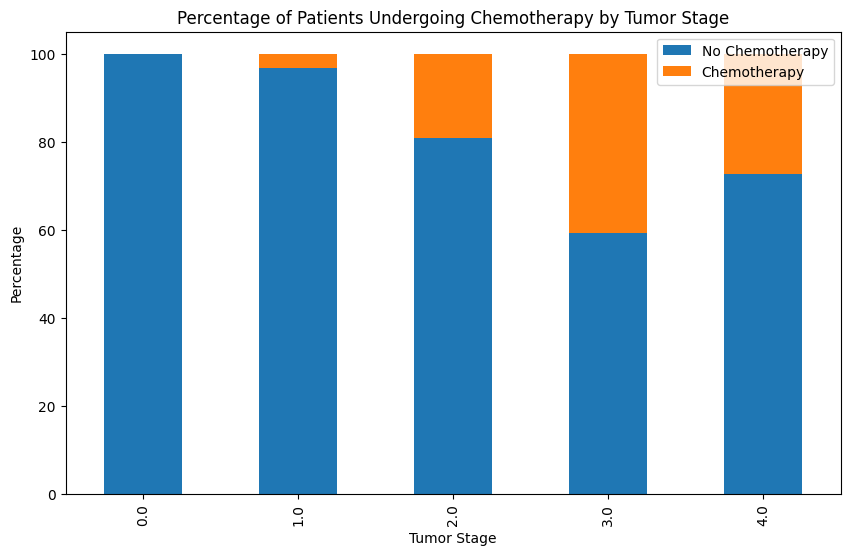

In [214]:
chemotherapy_percentage = df.groupby('Tumor Stage')['Chemotherapy'].value_counts(normalize=True).unstack(fill_value=0) * 100

chemotherapy_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Percentage of Patients Undergoing Chemotherapy by Tumor Stage")
plt.xlabel("Tumor Stage")
plt.ylabel("Percentage")
plt.legend(["No Chemotherapy", "Chemotherapy"])
plt.show()

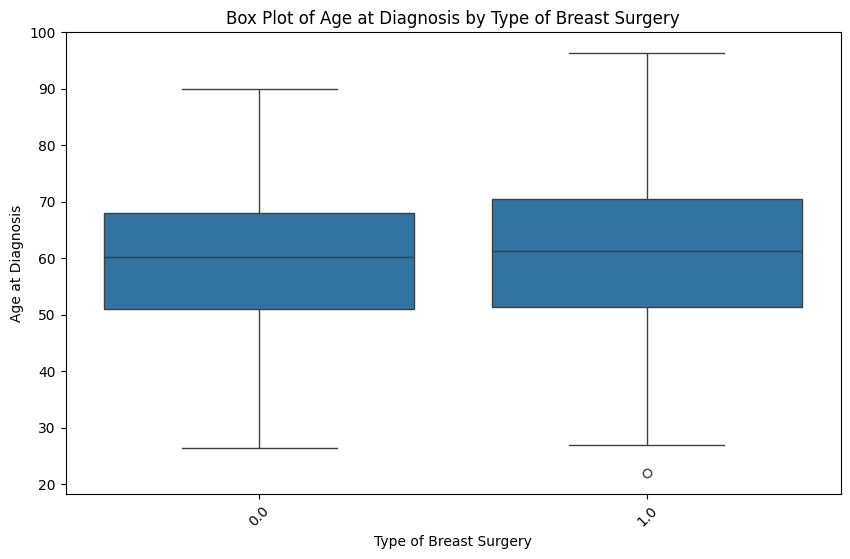

In [164]:
# Box Plot for Type of Breast Surgery
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of Breast Surgery', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by Type of Breast Surgery')
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

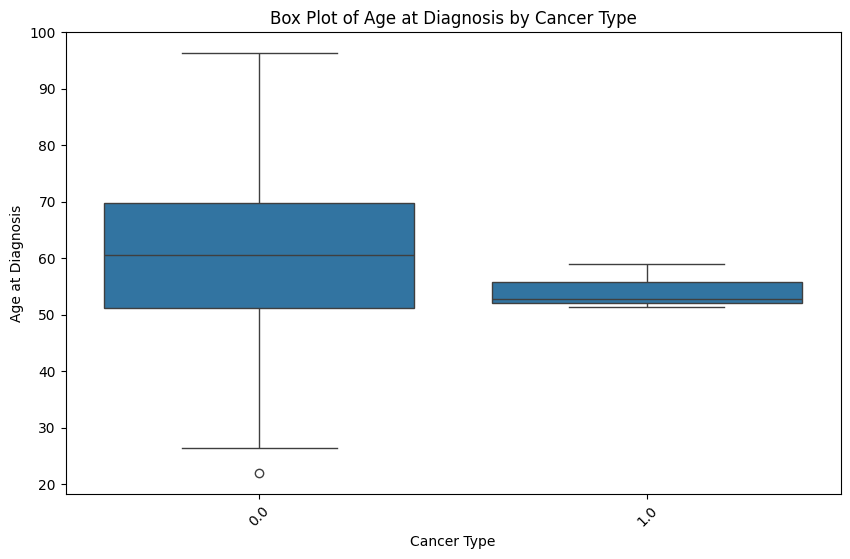

In [165]:

# Box Plot for Cancer Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer Type', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

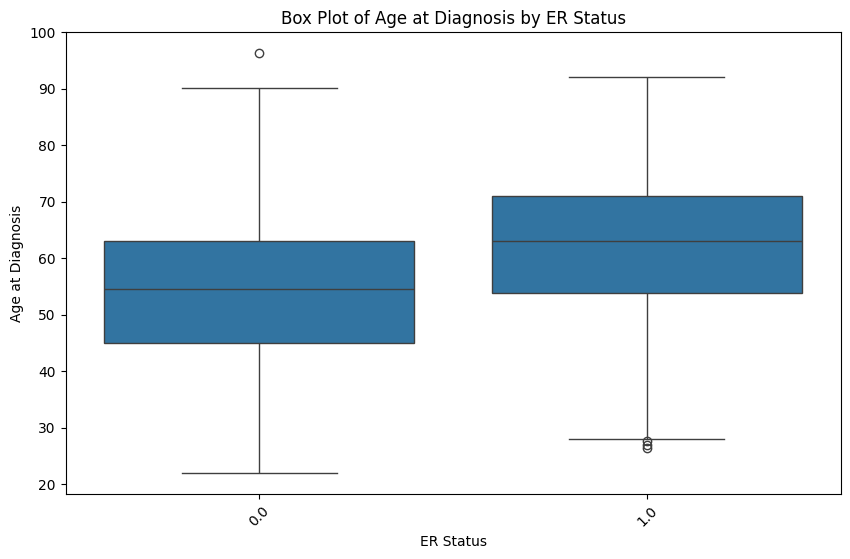

In [166]:
# Box Plot for ER Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='ER Status', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by ER Status')
plt.xlabel('ER Status')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

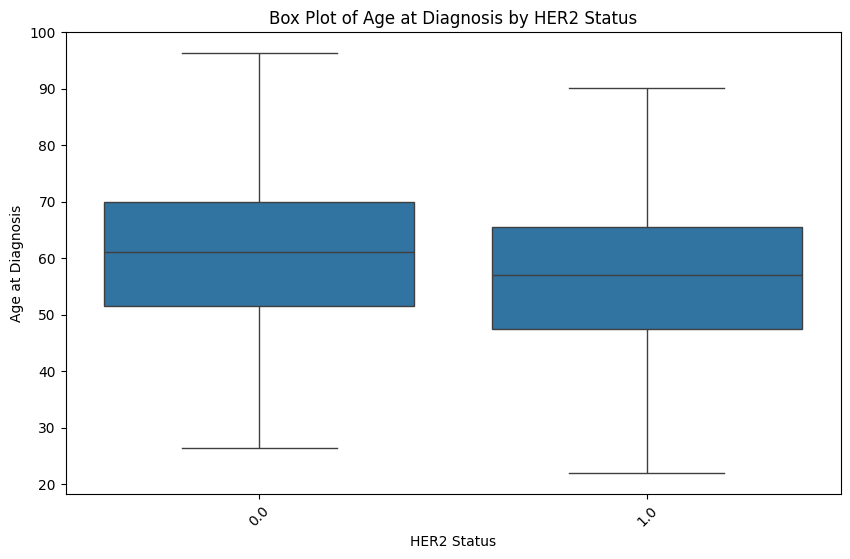

In [167]:
# Box Plot for HER2 Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='HER2 Status', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by HER2 Status')
plt.xlabel('HER2 Status')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

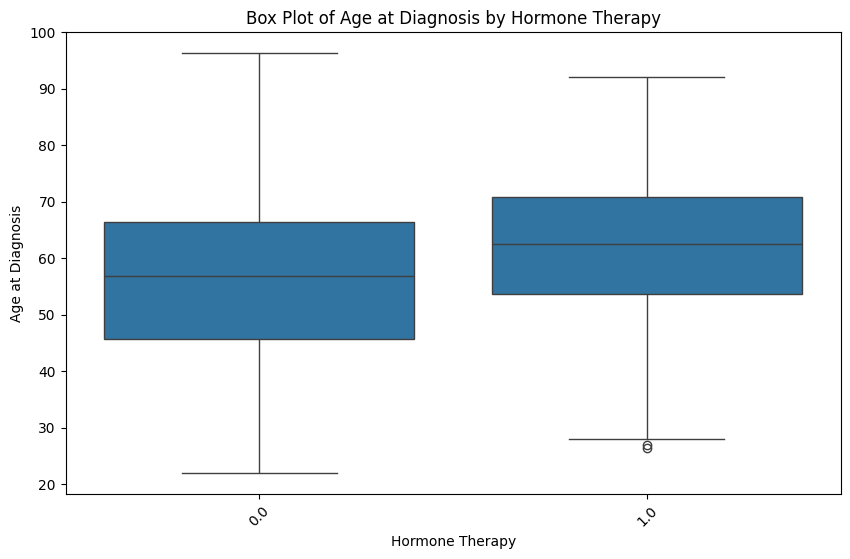

In [168]:

# Box Plot for Hormone Therapy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hormone Therapy', y='Age at Diagnosis', data=df)
plt.title('Box Plot of Age at Diagnosis by Hormone Therapy')
plt.xlabel('Hormone Therapy')
plt.ylabel('Age at Diagnosis')
plt.xticks(rotation=45)
plt.show()

<h1>Machine Learning Model 🤖📊</h1>

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [170]:
#Define x (features) and y (target)
x = df.drop('Overall Survival Status', axis=1)  # Replace 'target' with your target column name
y = df['Overall Survival Status']

# Step 3: Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,)


In [171]:
print("Train Shape:", x_train.shape, y_train.shape)
print("Test set Shape:", x_test.shape, y_test.shape)

Train Shape: (2107, 30) (2107,)
Test set Shape: (527, 30) (527,)


In [172]:
y_train.value_counts()

0.0    1397
1.0     710
Name: Overall Survival Status, dtype: int64

In [173]:
y_test.value_counts()

0.0    359
1.0    168
Name: Overall Survival Status, dtype: int64

 Scale Features

In [174]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
_test=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,...,Overall Survival (Months),PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,0.694551,0.691807,-0.030824,1.498213,-0.44326,0.838472,0.564028,0.563648,0.588495,-0.653971,...,0.103231,0.781573,-1.483957,0.276800,-0.811822,0.0,-0.029950,-0.466784,0.352892,0.834703
1,-0.461013,0.691807,-0.030824,-0.742195,-0.44326,0.112049,-0.947940,0.563648,0.588495,-0.653971,...,0.487306,0.781573,0.673874,0.495964,-0.811822,0.0,-0.029950,-0.818478,-1.417451,0.834703
2,1.497478,0.691807,-0.030824,1.498213,-0.44326,0.112049,1.068018,0.563648,0.588495,-0.653971,...,-0.708415,-1.279471,-1.483957,-0.470969,-0.811822,0.0,-0.029950,-0.115090,0.352892,0.834703
3,0.999911,0.691807,-0.030824,-0.742195,-0.44326,0.112049,3.083976,0.563648,0.588495,-0.653971,...,-0.836181,0.781573,0.673874,-1.136891,-0.811822,0.0,-0.029950,0.728975,0.352892,0.834703
4,-1.408870,0.691807,-0.030824,-0.742195,-0.44326,-1.340797,1.068018,-1.774158,-1.699251,0.920072,...,-1.467148,-1.279471,-1.483957,-1.170065,-0.811822,0.0,1.183594,0.166265,0.352892,0.834703


In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

In [176]:
models = {
    "LR":LogisticRegression(),
    "KNNR" : KNeighborsClassifier(), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVC":SVC()
    
    
}

In [177]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(x_test)))}')
    print('-'*30)

Using model: LR
Training Score: 0.9933554817275747
Test Score: 0.3206831119544592
RMSE: 0.824206823585889
------------------------------
Using model: KNNR
Training Score: 0.9326056003796868
Test Score: 0.7267552182163188
RMSE: 0.5227282102428386
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.6223908918406073
RMSE: 0.6144990709182503
------------------------------
Using model: RF
Training Score: 1.0
Test Score: 0.5768500948766604
RMSE: 0.6504997349141194
------------------------------
Using model: SVC
Training Score: 0.996203132415757
Test Score: 0.681214421252372
RMSE: 0.5646109977211107
------------------------------


In [178]:

lr_clf = KNeighborsClassifier()
lr_clf.fit(x_train, y_train)
y_pred=lr_clf.predict(x_test)

In [179]:
model = KNeighborsClassifier ()

model.fit(x_train, y_train)

KNeighborsClassifier()

In [180]:
y_pred = model.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0.

In [181]:
metrics.confusion_matrix(y_test, y_pred)

array([[314,  45],
       [ 99,  69]], dtype=int64)

<Axes: >

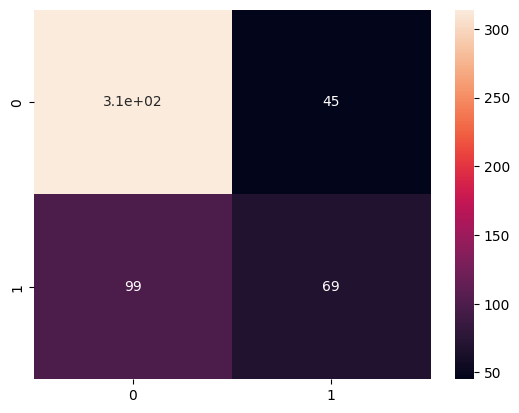

In [182]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True)

In [183]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.68%


In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       359
         1.0       0.61      0.41      0.49       168

    accuracy                           0.73       527
   macro avg       0.68      0.64      0.65       527
weighted avg       0.71      0.73      0.71       527



MODELING

In [186]:
y=df['Overall Survival Status']

In [187]:
# Convert only categories aftre search for them by Object  varables in X into dummies

import pandas as pd
x_new = pd.get_dummies(x, columns=x.select_dtypes(include=['object']).columns)

In [189]:
x_new.shape

(2634, 30)

feature importance to y process

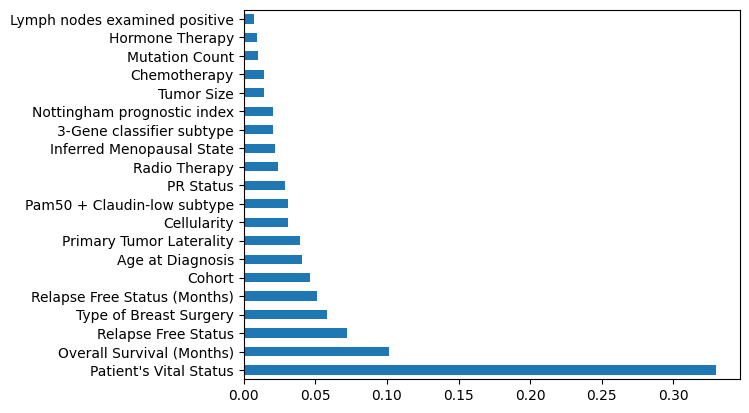

In [190]:
#import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
#Fit the model
model = RandomForestClassifier()
model.fit(x_new,y)
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x_new.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [191]:
print(x_new.shape)

(2634, 30)


In [192]:
# Apply min max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_new)

In [193]:
# prompt: apply feature selection to choose the best 20 features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
X_selected = selector.fit_transform(x_scaled, y)

# Get the names of the selected features
selected_features = x_new.columns[selector.get_support()]
print(selected_features)

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cellularity', 'Chemotherapy', 'Cohort',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Lymph nodes examined positive', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'PR Status',
       'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')


In [194]:
# Create the dataframe using X_selected and selected_features  names

import pandas as pd
x_selected = pd.DataFrame(X_selected, columns=selected_features)

In [195]:
x_selected.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cellularity,Chemotherapy,Cohort,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Lymph nodes examined positive,Nottingham prognostic index,Overall Survival (Months),PR Status,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,0.722431,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.222222,0.813548,0.267962,0.0,0.360870,0.0,0.666667,0.116022,0.50,1.0
1,0.285906,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.000000,0.487097,0.238270,1.0,0.217381,0.0,0.000000,0.049724,0.25,1.0
2,0.362292,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.0,1.0,0.022222,0.488710,0.460867,1.0,0.393743,1.0,0.333333,0.077348,0.50,0.0
3,0.517630,1.0,0.0,1.0,1.0,0.0,0.571429,1.0,1.0,1.0,0.066667,0.491935,0.464339,1.0,0.423622,0.0,0.333333,0.132597,0.50,1.0
4,0.740183,1.0,0.0,0.0,1.0,0.0,0.571429,1.0,0.0,1.0,0.177778,0.819355,0.116460,1.0,0.048281,1.0,0.000000,0.215470,0.50,0.0


In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




split the data

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size = 0.2, random_state = 44,shuffle=True )

print("x train shape is : ",X_train.shape)
print("x test shape is : ",X_test.shape)
print("y train shape is : ",y_train.shape)
print("y test shape is : ",y_test.shape)


x train shape is :  (2107, 20)
x test shape is :  (527, 20)
y train shape is :  (2107,)
y test shape is :  (527,)


In [198]:
# Apply smoten on X_train and y_train

from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize the SMOTEENN object
smote_enn = SMOTEENN(random_state=42)

# Apply the SMOTEENN to balance the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

print("X_train_resampled shape:", X_resampled.shape)
print("y_train_resampled shape:", y_resampled.shape)


Original class distribution: Counter({0.0: 1384, 1.0: 723})
Resampled class distribution: Counter({1.0: 1301, 0.0: 1238})
X_train_resampled shape: (2539, 20)
y_train_resampled shape: (2539,)


In [199]:
X_resampled= X_train
y_resampled= y_train

In [200]:
# apply all single  (Logistic regression,  KNN, Naive bayies, SVM, Decision tree), ensemble (RF, Extratrees, bagging m XGBoosting , gradient boosting , adaboost , voting , and stacking) ML models usign grid search

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

Logistic Regression: Best Parameters - {'C': 10}, Best Score - 0.9829113710303835
KNN: Best Parameters - {'n_neighbors': 3}, Best Score - 0.9477839943263049
Naive Bayes: Best Parameters - {}, Best Score - 0.9240614199997749
SVM: Best Parameters - {'C': 10, 'kernel': 'rbf'}, Best Score - 0.9914534340489244
Decision Tree: Best Parameters - {'max_depth': 10}, Best Score - 0.9933525458454818


In [201]:
# Define parameter grids for all models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'Extra Trees': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
    },
    'Bagging': {
        'n_estimators': [50, 100],
        'max_samples': [0.5, 0.8],
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
    }
}

# Define ensemble models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize dictionary to store the best models
best_models = {}

# Loop through the models and perform GridSearchCV
for name, model in ensemble_models.items():
    try:
        print(f"Fitting {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_resampled, y_resampled)
        best_models[name] = grid_search.best_estimator_
        print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")
    except Exception as e:
        print(f"Error with {name}: {e}")

Fitting Random Forest...
Random Forest: Best Parameters - {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, Best Score - 0.9966768357893077
Fitting Extra Trees...
Extra Trees: Best Parameters - {'max_depth': None, 'n_estimators': 200}, Best Score - 0.9962006506737513
Fitting Bagging...
Bagging: Best Parameters - {'max_samples': 0.5, 'n_estimators': 50}, Best Score - 0.9952527833751731
Fitting AdaBoost...


c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

AdaBoost: Best Parameters - {'learning_rate': 0.1, 'n_estimators': 100}, Best Score - 0.9933525458454818
Fitting Gradient Boosting...
Gradient Boosting: Best Parameters - {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, Best Score - 0.9976258288210197
Fitting XGBoost...
XGBoost: Best Parameters - {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, Best Score - 0.9981008882034423


In [202]:
best_models

{'Random Forest': RandomForestClassifier(min_samples_split=5, n_estimators=200),
 'Extra Trees': ExtraTreesClassifier(n_estimators=200),
 'Bagging': BaggingClassifier(max_samples=0.5, n_estimators=50),
 'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=100),
 'Gradient Boosting': GradientBoostingClassifier(n_estimators=200),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               

In [206]:
# Voting and Stacking (Example - Customize estimators and voting method)
estimators = [('rf',RandomForestClassifier (n_estimators=200)),
 ('adb', best_models['AdaBoost']), ('bagging', best_models['Bagging'])
 ]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_resampled, y_resampled)
best_models['Voting'] = voting_clf

c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [207]:
# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

--- Random Forest ---
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       372
         1.0     1.0000    1.0000    1.0000       155

    accuracy                         1.0000       527
   macro avg     1.0000    1.0000    1.0000       527
weighted avg     1.0000    1.0000    1.0000       527

--- Extra Trees ---
Accuracy: 0.9981024667931688
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9973    1.0000    0.9987       372
         1.0     1.0000    0.9935    0.9968       155

    accuracy                         0.9981       527
   macro avg     0.9987    0.9968    0.9977       527
weighted avg     0.9981    0.9981    0.9981       527

--- Bagging ---
Accuracy: 0.9981024667931688
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9973    1.0000    0.9987       372
         1.0     1.0000    0.9935    0

In [208]:
# Need to implement stacking alogorithm

from sklearn.ensemble import StackingClassifier

# Define base models and meta-learner
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('adb', best_models['AdaBoost']),
    ('bagging', best_models['Bagging']),
]
meta_learner = LogisticRegression()
# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)
# Train the stacking classifier
stacking_clf.fit(X_resampled, y_resampled)

# Add the stacking model to the best_models dictionary
best_models['Stacking'] = stacking_clf

# Evaluate the stacking model on the test set
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
print(f"--- Stacking ---")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

--- Stacking ---
Accuracy: 0.9981024667931688
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9973    1.0000    0.9987       372
         1.0     1.0000    0.9935    0.9968       155

    accuracy                         0.9981       527
   macro avg     0.9987    0.9968    0.9977       527
weighted avg     0.9981    0.9981    0.9981       527



In [209]:
import joblib

In [210]:
joblib.dump(model, 'model.h5')

['model.h5']

In [211]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [212]:
x.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'PR Status', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

<h1>Thanks for watching — hope you enjoyed it! 😊🎀📊</h1>